<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/Typhoon_Phase4_ANN(new_data_2023_04_05).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

cv = LeaveOneOut()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   
%cd /content/drive/My Drive/8.Colab Notebooks/2023.02.09 Typhoon2/

Mounted at /content/drive
/content/drive/My Drive/8.Colab Notebooks/2023.02.09 Typhoon2


In [ ]:
import os
directory = 'path'
for filename in os.listdir(directory):
    # Check if the file has a .txt extension
    if filename.endswith('.txt'):
        # Print the file name
        print(filename)

AAO_Reanalysis.txt
AMO_Reanalysis.txt
AO_msl_Reanalysis.txt
EMI_Reanalysis.txt
GMT_Reanalysis.txt
NINO3_Reanalysis.txt
NINO4_Reanalysis.txt
NINO34_Reanalysis.txt
PDO_Reanalysis.txt
PNA_Reanalysis.txt
QBO_Reanalysis.txt


In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import datetime

scaler = StandardScaler()

directory = 'path'

df_list = []

# Loop through all files in the directory
for filename in os.listdir(directory):
  if filename.endswith(".txt"):
      filepath = os.path.join(directory, filename)
      with open(filepath) as f:
          lines = [line.split() for line in f]
      data = []
      for line in lines:
          year = int(line[0])
          values = [float(x) for x in line[1:]]
          row_dict = {'year': year}
          for i, value in enumerate(values):  
             month = i + 1
             month_name = pd.Timestamp(year=2000, month=month, day=1).strftime('%B').lower()
             month_name = datetime.datetime.strptime(month_name, "%B").month
             row_dict[month_name] = value
          data.append(row_dict)
    # create the DataFrame
      df = pd.DataFrame(data)
      df = df.melt(id_vars=['year'], var_name='month', value_name=filename.replace('.txt', ''))
      df = df.sort_values(['year', 'month'])
      column_name = filename.replace('.txt', '')
      df[column_name] = scaler.fit_transform(df[column_name].values.reshape(-1, 1))
      df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
rawdata_df = pd.concat(df_list, ignore_index=True)

# Group by year and month and aggregate values
rawdata_df = rawdata_df.groupby(['year', 'month']).mean().reset_index()

# Fill missing values with 0 if needed
# rawdata_df = rawdata_df.fillna(0)

rawdata_df

year  month  AAO_Reanalysis  AMO_Reanalysis  AO_msl_Reanalysis  \
0     1854      1             NaN        1.409099                NaN   
1     1854      2             NaN        2.094916                NaN   
2     1854      3             NaN        1.579036                NaN   
3     1854      4             NaN        1.142056                NaN   
4     1854      5             NaN        0.237749                NaN   
...    ...    ...             ...             ...                ...   
2011  2021      8       -0.124464        1.032811           0.104003   
2012  2021      9       -1.726965        1.536552          -0.612989   
2013  2021     10       -0.894742        1.639728          -0.526990   
2014  2021     11       -1.793560        1.621521          -0.065995   
2015  2021     12       -1.779425        1.148125          -0.338992   

      EMI_Reanalysis  GMT_Reanalysis  NINO3_Reanalysis  NINO4_Reanalysis  \
0          -0.315283             NaN          0.064751         -0.393332   
1           0.540181             NaN         -0.033065          0.002007   
2           0.979474             NaN         -0.085417          0.413319   
3           0.931131             NaN          0.073017          0.471222   
4           0.584321             NaN          0.210786          0.680872   
...              ...             ...               ...               ...   
2011       -0.523369        1.667982         -0.615827         -0.267543   
2012       -0.653685        1.933900         -0.650269         -0.782682   
2013       -0.840752        2.069276         -0.987803         -1.074194   
2014       -0.670500        1.914560         -1.337736         -1.082181   
2015       -0.197578        1.692156         -1.753798         -1.329767   

      NINO34_Reanalysis  PDO_Reanalysis  PNA_Reanalysis  QBO_Reanalysis  
0             -0.436104        0.106996             NaN             NaN  
1             -0.442982        0.061996             NaN             NaN  
2              0.017863        0.234996             NaN             NaN  
3              0.353523        0.155996             NaN             NaN  
4              0.478708       -0.220005             NaN             NaN  
...                 ...             ...             ...             ...  
2011          -0.631447       -0.385005       -0.081772       -0.619857  
2012          -0.702981       -1.249005       -0.040148       -0.827774  
2013          -1.079911       -2.306006       -0.392468       -1.028265  
2014          -1.161075       -2.050005        0.851803       -1.168213  
2015          -1.441709       -2.065005       -3.211032       -1.322234  

[2016 rows x 13 columns]

In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import datetime

scaler = StandardScaler()

directory2 = 'country'

df2_list = []

# Loop through all files in the directory2
for filename in os.listdir(directory2):
  if filename.endswith(".txt"):
      filepath = os.path.join(directory2, filename)
      with open(filepath) as f:
          lines = [line.split() for line in f]
      data2 = []
      for line in lines:
          year = int(line[0])
          values = [float(x) if x != '-9' else 0 for x in line[1:]]
          row_dict = {'year': year}
          for i, value in enumerate(values):  
             month = i + 1
             month_name = pd.Timestamp(year=2000, month=month, day=1).strftime('%B').lower()
             month_name = datetime.datetime.strptime(month_name, "%B").month
             row_dict[month_name] = value
          data2.append(row_dict)
    # create the DataFrame
      df2 = pd.DataFrame(data2)
      df2 = df2.melt(id_vars=['year'], var_name='month', value_name=filename.replace('.txt', ''))
      df2 = df2.sort_values(['year', 'month'])
      column_name = filename.replace('.txt', '')
      #df2[column_name] = scaler.fit_transform(df2[column_name].values.reshape(-1, 1))
      df2_list.append(df2)

# Concatenate all DataFrames in the list into a single DataFrame
result_df = pd.concat(df2_list, ignore_index=True)

# Group by year and month and aggregate values
result_df = result_df.groupby(['year', 'month']).mean().reset_index()

result_df = result_df.rename(columns={'Mexico_TC_freq_NHC-ENP': 'Mexic2_TC_freq_NHC-ENP'})
result_df = result_df.rename(columns={'Mexico_TC_landfall_intensity_NHC-ENP': 'Mexic2_TC_landfall_intensity_NHC-ENP'})
result_df = result_df.rename(columns={'US_TC_freq_NHC-ENP': 'U2_TC_freq_NHC-ENP'})
result_df = result_df.rename(columns={'US_TC_landfall_intensity_NHC-ENP': 'U2_TC_landfall_intensity_NHC-ENP'})
result_df.columns = map(str.lower, result_df.columns)
# Fill missing values with 0 if neederesult# merged_df2 = merged_df2.fillna(0)
pd.options.display.max_columns = None
result_df

year  month  korea_tc_freq_jtwc-wnp  japan_tc_freq_jtwc-wnp  \
0    1959      1                     0.0                     0.0   
1    1959      2                     0.0                     0.0   
2    1959      3                     0.0                     0.0   
3    1959      4                     0.0                     0.0   
4    1959      5                     0.0                     0.0   
..    ...    ...                     ...                     ...   
751  2021      8                     1.0                     4.0   
752  2021      9                     1.0                     1.0   
753  2021     10                     0.0                     1.0   
754  2021     11                     0.0                     0.0   
755  2021     12                     0.0                     0.0   

     korea_tc_landfall_intensity_jtwc-wnp  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
..                                    ...   
751                                  26.0   
752                                  55.0   
753                                   0.0   
754                                   0.0   
755                                   0.0   

     japan_tc_landfall_intensity_jtwc-wnp  taiwan_tc_freq_jtwc-wnp  \
0                                     0.0                      0.0   
1                                     0.0                      0.0   
2                                     0.0                      0.0   
3                                     0.0                      0.0   
4                                     0.0                      0.0   
..                                    ...                      ...   
751                                  32.0                      1.0   
752                                  42.0                      1.0   
753                                  78.0                      0.0   
754                                   0.0                      0.0   
755                                   0.0                      0.0   

     taiwan_tc_landfall_intensity_jtwc-wnp  china_tc_freq_jtwc-wnp  \
0                                      0.0                     0.0   
1                                      0.0                     0.0   
2                                      0.0                     0.0   
3                                      0.0                     0.0   
4                                      0.0                     0.0   
..                                     ...                     ...   
751                                   45.0                     1.0   
752                                  148.0                     1.0   
753                                    0.0                     2.0   
754                                    0.0                     0.0   
755                                    0.0                     1.0   

     china_tc_landfall_intensity_jtwc-wnp  vietnam_tc_freq_jtwc-wnp  \
0                                     0.0                       0.0   
1                                     0.0                       0.0   
2                                     0.0                       0.0   
3                                     0.0                       0.0   
4                                     0.0                       0.0   
..                                    ...                       ...   
751                                  24.0                       0.0   
752                                 105.0                       2.0   
753                                  42.0                       2.0   
754                                   0.0                       0.0   
755                                  63.0                       1.0   

     vietnam_tc_landfall_intensity_jtwc-wnp  phili_tc_freq_jtwc-wnp  \
0                                       0

In [ ]:
column_titles = list(result_df.columns)
column_titles.remove('year')
column_titles.remove('month')
column_titles.sort()
column_titles

['austrailia_tc_freq_jtwc-sh',
 'austrailia_tc_landfall_intensity_jtwc-sh',
 'bangla_tc_freq_jtwc-nio',
 'bangla_tc_landfall_intensity_jtwc-nio',
 'carribean_tc_freq_nhc-nat',
 'carribean_tc_landfall_intensity_nhc-nat',
 'china_tc_freq_jtwc-wnp',
 'china_tc_landfall_intensity_jtwc-wnp',
 'india_tc_freq_jtwc-nio',
 'india_tc_landfall_intensity_jtwc-nio',
 'japan_tc_freq_jtwc-wnp',
 'japan_tc_landfall_intensity_jtwc-wnp',
 'korea_tc_freq_jtwc-wnp',
 'korea_tc_landfall_intensity_jtwc-wnp',
 'madagascar_tc_freq_jtwc-sh',
 'madagascar_tc_landfall_intensity_jtwc-sh',
 'mexic2_tc_freq_nhc-enp',
 'mexic2_tc_landfall_intensity_nhc-enp',
 'mexico_tc_freq_nhc-nat',
 'mexico_tc_landfall_intensity_nhc-nat',
 'myanmar_tc_freq_jtwc-nio',
 'myanmar_tc_landfall_intensity_jtwc-nio',
 'pakistan_tc_freq_jtwc-nio',
 'pakistan_tc_landfall_intensity_jtwc-nio',
 'phili_tc_freq_jtwc-wnp',
 'phili_tc_landfall_intensity_jtwc-wnp',
 'sri_tc_freq_jtwc-nio',
 'sri_tc_landfall_intensity_jtwc-nio',
 'taiwan_tc_freq_j

In [ ]:
country_codes = {
    'austrailia': 0,
    'bangla': 1,
    'carribean': 2,
    'china': 3,
    'india': 4,
    'japan': 5,
    'korea': 6,
    'madagascar': 7,
    'mexic2': 8,
    'mexico': 9,
    'myanmar': 10,
    'phili': 11,
    'pakistan': 12,
    'sri': 13,
    'taiwan': 14,
    'u2': 15,
    'us': 16,
    'vietnam': 17,
}

In [ ]:
result_dfs = []

for col in column_titles:

    for key in country_codes.keys():
        if key in col.lower():
            country = country_codes[key]
            break
    else:
        country = None

    # Add the 'country' column to result_df
    result_df['country'] = country
    result_df['name'] = key

    # Check if the selected column name contains 'freq' or 'intensity', and replace the entire column name with either 'freq' or 'intensity' accordingly
    if 'freq' in col.lower():
        new_column_name = 'freq'
    elif 'intensity' in col.lower():
        new_column_name = 'intensity'
    else:
        new_column_name = col

    # Get the years without nan values for the selected country
    years = result_df[result_df[col].notna()]['year'].unique()

    # Filter dataframe A for the selected country and years
    x = rawdata_df[rawdata_df['year'].isin(years)]

    # Filter dataframe B for the selected country and years, and rename the selected column
    y = result_df[['year', 'month', 'country', 'name', col]][result_df[col].notna() & result_df['year'].isin(years)].rename(columns={col: new_column_name})

    xy = pd.merge(x, y, on=['year', 'month'])
    result_dfs.append(xy)

alldfs = pd.concat(result_dfs, ignore_index=True)
alldfs

year  month  AAO_Reanalysis  AMO_Reanalysis  AO_msl_Reanalysis  \
0      1991      1       -0.941385       -1.576935           0.694996   
1      1991      2        0.626454       -1.285615          -0.228994   
2      1991      3       -0.431124       -1.334168          -0.238993   
3      1991      4        0.497968       -1.965362           1.088992   
4      1991      5        1.212183       -2.141368           0.525998   
...     ...    ...             ...             ...                ...   
24235  2021      8       -0.124464        1.032811           0.104003   
24236  2021      9       -1.726965        1.536552          -0.612989   
24237  2021     10       -0.894742        1.639728          -0.526990   
24238  2021     11       -1.793560        1.621521          -0.065995   
24239  2021     12       -1.779425        1.148125          -0.338992   

       EMI_Reanalysis  GMT_Reanalysis  NINO3_Reanalysis  NINO4_Reanalysis  \
0            2.038820        0.333561          0.103327          1.192017   
1            2.013598        0.497946         -0.031687          1.148090   
2            1.540675       -0.038724         -0.143280          0.824631   
3            1.340997        0.377074          0.096438          0.870554   
4            1.418766        0.130496          0.422950          1.002334   
...               ...             ...               ...               ...   
24235       -0.523369        1.667982         -0.615827         -0.267543   
24236       -0.653685        1.933900         -0.650269         -0.782682   
24237       -0.840752        2.069276         -0.987803         -1.074194   
24238       -0.670500        1.914560         -1.337736         -1.082181   
24239       -0.197578        1.692156         -1.753798         -1.329767   

       NINO34_Reanalysis  PDO_Reanalysis  PNA_Reanalysis  QBO_Reanalysis  \
0               0.603893       -1.199005       -0.477203        0.926463   
1               0.452571       -0.586005        0.891941        0.949578   
2               0.155429       -0.451005       -1.266580        0.838374   
3               0.422306       -0.950005        0.416234        0.329182   
4               0.466327       -0.984005       -0.209618       -0.295706   
...                  ...             ...             ...             ...   
24235          -0.631447       -0.385005       -0.081772       -0.619857   
24236          -0.702981       -1.249005       -0.040148       -0.827774   
24237          -1.079911       -2.306006       -0.392468       -1.028265   
24238          -1.161075       -2.050005        0.851803       -1.168213   
24239          -1.441709       -2.065005       -3.211032       -1.322234   

       country        name  freq  intensity  
0            0  austrailia   0.0        NaN  
1            0  austrailia   1.0        NaN  
2            0  austrailia   0.0        NaN  
3            0  austrailia   0.0        NaN  
4            0  austrailia   0.0        NaN  
...        ...         ...   ...        ...  
24235       17     vietnam   NaN        0.0  
24236       17     vietnam   NaN       36.0  
24237       17     vietnam   NaN       36.0  
24238       17     vietnam   NaN        0.0  
24239       17     vietnam   NaN      130.0  

[24240 rows x 17 columns]

In [ ]:
freqdf = alldfs.iloc[:,0:15]
freqdf = freqdf.dropna().reset_index(drop=True)
freqdf

year  month  AAO_Reanalysis  AMO_Reanalysis  AO_msl_Reanalysis  \
0      1991      1       -0.941385       -1.576935           0.694996   
1      1991      2        0.626454       -1.285615          -0.228994   
2      1991      3       -0.431124       -1.334168          -0.238993   
3      1991      4        0.497968       -1.965362           1.088992   
4      1991      5        1.212183       -2.141368           0.525998   
...     ...    ...             ...             ...                ...   
24235  2021      8       -0.124464        1.032811           0.104003   
24236  2021      9       -1.726965        1.536552          -0.612989   
24237  2021     10       -0.894742        1.639728          -0.526990   
24238  2021     11       -1.793560        1.621521          -0.065995   
24239  2021     12       -1.779425        1.148125          -0.338992   

       EMI_Reanalysis  GMT_Reanalysis  NINO3_Reanalysis  NINO4_Reanalysis  \
0            2.038820        0.333561          0.103327          1.192017   
1            2.013598        0.497946         -0.031687          1.148090   
2            1.540675       -0.038724         -0.143280          0.824631   
3            1.340997        0.377074          0.096438          0.870554   
4            1.418766        0.130496          0.422950          1.002334   
...               ...             ...               ...               ...   
24235       -0.523369        1.667982         -0.615827         -0.267543   
24236       -0.653685        1.933900         -0.650269         -0.782682   
24237       -0.840752        2.069276         -0.987803         -1.074194   
24238       -0.670500        1.914560         -1.337736         -1.082181   
24239       -0.197578        1.692156         -1.753798         -1.329767   

       NINO34_Reanalysis  PDO_Reanalysis  PNA_Reanalysis  QBO_Reanalysis  \
0               0.603893       -1.199005       -0.477203        0.926463   
1               0.452571       -0.586005        0.891941        0.949578   
2               0.155429       -0.451005       -1.266580        0.838374   
3               0.422306       -0.950005        0.416234        0.329182   
4               0.466327       -0.984005       -0.209618       -0.295706   
...                  ...             ...             ...             ...   
24235          -0.631447       -0.385005       -0.081772       -0.619857   
24236          -0.702981       -1.249005       -0.040148       -0.827774   
24237          -1.079911       -2.306006       -0.392468       -1.028265   
24238          -1.161075       -2.050005        0.851803       -1.168213   
24239          -1.441709       -2.065005       -3.211032       -1.322234   

       country        name  
0            0  austrailia  
1            0  austrailia  
2            0  austrailia  
3            0  austrailia  
4            0  austrailia  
...        ...         ...  
24235       17     vietnam  
24236       17     vietnam  
24237       17     vietnam  
24238       17     vietnam  
24239       17     vietnam  

[24240 rows x 15 columns]

In [ ]:
intendf = alldfs.drop(columns=['freq'])
intendf = intendf.dropna().reset_index(drop=True)
intendf

year  month  AAO_Reanalysis  AMO_Reanalysis  AO_msl_Reanalysis  \
0      1991      1       -0.941385       -1.576935           0.694996   
1      1991      2        0.626454       -1.285615          -0.228994   
2      1991      3       -0.431124       -1.334168          -0.238993   
3      1991      4        0.497968       -1.965362           1.088992   
4      1991      5        1.212183       -2.141368           0.525998   
...     ...    ...             ...             ...                ...   
12115  2021      8       -0.124464        1.032811           0.104003   
12116  2021      9       -1.726965        1.536552          -0.612989   
12117  2021     10       -0.894742        1.639728          -0.526990   
12118  2021     11       -1.793560        1.621521          -0.065995   
12119  2021     12       -1.779425        1.148125          -0.338992   

       EMI_Reanalysis  GMT_Reanalysis  NINO3_Reanalysis  NINO4_Reanalysis  \
0            2.038820        0.333561          0.103327          1.192017   
1            2.013598        0.497946         -0.031687          1.148090   
2            1.540675       -0.038724         -0.143280          0.824631   
3            1.340997        0.377074          0.096438          0.870554   
4            1.418766        0.130496          0.422950          1.002334   
...               ...             ...               ...               ...   
12115       -0.523369        1.667982         -0.615827         -0.267543   
12116       -0.653685        1.933900         -0.650269         -0.782682   
12117       -0.840752        2.069276         -0.987803         -1.074194   
12118       -0.670500        1.914560         -1.337736         -1.082181   
12119       -0.197578        1.692156         -1.753798         -1.329767   

       NINO34_Reanalysis  PDO_Reanalysis  PNA_Reanalysis  QBO_Reanalysis  \
0               0.603893       -1.199005       -0.477203        0.926463   
1               0.452571       -0.586005        0.891941        0.949578   
2               0.155429       -0.451005       -1.266580        0.838374   
3               0.422306       -0.950005        0.416234        0.329182   
4               0.466327       -0.984005       -0.209618       -0.295706   
...                  ...             ...             ...             ...   
12115          -0.631447       -0.385005       -0.081772       -0.619857   
12116          -0.702981       -1.249005       -0.040148       -0.827774   
12117          -1.079911       -2.306006       -0.392468       -1.028265   
12118          -1.161075       -2.050005        0.851803       -1.168213   
12119          -1.441709       -2.065005       -3.211032       -1.322234   

       country        name  intensity  
0            0  austrailia        0.0  
1            0  austrailia       30.0  
2            0  austrailia        0.0  
3            0  austrailia        0.0  
4            0  austrailia        0.0  
...        ...         ...        ...  
12115       17     vietnam        0.0  
12116       17     vietnam       36.0  
12117       17     vietnam       36.0  
12118       17     vietnam        0.0  
12119       17     vietnam      130.0  

[12120 rows x 16 columns]

In [ ]:
# 2 8 9 11 13 16 - examtion
freqdf_e = freqdf[~freqdf['country'].isin([2, 8, 9, 11, 13, 16])].reset_index(drop=True)
intendf_e = intendf[~intendf['country'].isin([2, 8, 9, 11, 13, 16])].reset_index(drop=True)

In [ ]:
# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model for predicting y1
model_1 = Sequential()
model_1.add(Dense(64, input_dim=13, activation="relu"))
model_1.add(Dense(32, activation="relu"))
model_1.add(Dense(1, activation="linear"))
model_1.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y1 and y2

y1_preds = []
y1_actuals = []
y1_test_country = []
y1_test_month = []
y1_test_year = []

# Loop over each year and perform LOOCV
for year in range(1959, 2022):
    # Split the data into training and test sets based on the year
    freqdf_x1_train = freqdf[freqdf['year'] != year].iloc[:,1:14]
    freqdf_x1_test = freqdf[freqdf['year'] == year].iloc[:,1:14]
    freqdf_y1_train = freqdf[freqdf['year'] != year].iloc[:,[0, 1, 14, 15]]
    freqdf_y1_test = freqdf[freqdf['year'] == year].iloc[:,[0, 1, 14, 15]]

    # Train the model on the training set
    model_1.fit(freqdf_x1_train, freqdf_y1_train.iloc[:,3], epochs=100, batch_size=32, verbose=0)

    # Predict the output for the test set
    y1_pred = model_1.predict(freqdf_x1_test)

    # Add the predictions and actual values to the respective lists
    y1_preds.extend(y1_pred)
    y1_actuals.extend(freqdf_y1_test.iloc[:,3].values)
    y1_test_year.extend(freqdf_y1_test.iloc[:,0].values)
    y1_test_month.extend(freqdf_y1_test.iloc[:,1].values)
    y1_test_country.extend(freqdf_y1_test.iloc[:,2].values)

# Convert predictions to DataFrame and concatenate with country and month columns
y1_pred_df = pd.DataFrame({"year": y1_test_year, "month": y1_test_month, "country": y1_test_country, "y1_pred": np.squeeze(y1_preds),"y1_actual": y1_actuals})
y1_pred_df = y1_pred_df[['year', 'month', 'country', 'y1_pred', 'y1_actual']]

# Save predictions to CSV file
y1_pred_df.to_csv('y_pred_ANN_freq3.csv', index=False)

import pickle

# 모델 저장
with open('model_1.pkl', 'wb') as f:
    pickle.dump(model_1, f)

# 모델 불러오기
with open('model_1.pkl', 'rb') as f:
    model_1_loaded = pickle.load(f)

In [ ]:
# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pickle


# Define the neural network model for predicting y2
model_2 = Sequential()
model_2.add(Dense(64, input_dim=13, activation="relu"))
model_2.add(Dense(32, activation="relu"))
model_2.add(Dense(1, activation="linear"))
model_2.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y2 and y2

y2_preds = []
y2_actuals = []
y2_test_country = []
y2_test_month = []
y2_test_year = []

# Loop over each year and perform LOOCV
for year in range(1959, 2022):
    # Split the data into training and test sets based on the year
    intendf_x2_train = intendf[intendf['year'] != year].iloc[:,1:14]
    intendf_x2_test = intendf[intendf['year'] == year].iloc[:,1:14]
    intendf_y2_train = intendf[intendf['year'] != year].iloc[:,[0, 1, 14, 15]]
    intendf_y2_test = intendf[intendf['year'] == year].iloc[:,[0, 1, 14, 15]]

    # Train the model on the training set
    model_2.fit(intendf_x2_train, intendf_y2_train.iloc[:,3], epochs=100, batch_size=32, verbose=0)

    # Predict the output for the test set
    y2_pred = model_2.predict(intendf_x2_test)

    # Add the predictions and actual values to the respective lists
    y2_preds.extend(y2_pred)
    y2_actuals.extend(intendf_y2_test.iloc[:,3].values)
    y2_test_year.extend(intendf_y2_test.iloc[:,0].values)
    y2_test_month.extend(intendf_y2_test.iloc[:,1].values)
    y2_test_country.extend(intendf_y2_test.iloc[:,2].values)

# Convert predictions to DataFrame and concatenate with country and month columns
y2_pred_df = pd.DataFrame({"year": y2_test_year, "month": y2_test_month, "country": y2_test_country, "y2_pred": np.squeeze(y2_preds),"y2_actual": y2_actuals})
y2_pred_df = y2_pred_df[['year', 'month', 'country', 'y2_pred', 'y2_actual']]

# Save predictions to CSV file
y2_pred_df.to_csv('y_pred_ANN_inten3.csv', index=False)

import pickle

# 모델 저장
with open('model_2.pkl', 'wb') as f:
    pickle.dump(model_2, f)

# 모델 불러오기
with open('model_2.pkl', 'rb') as f:
    model_2_loaded = pickle.load(f)

RMSE for y1: 2.086896507914925
Correlation for y1: 0.6557047952014421


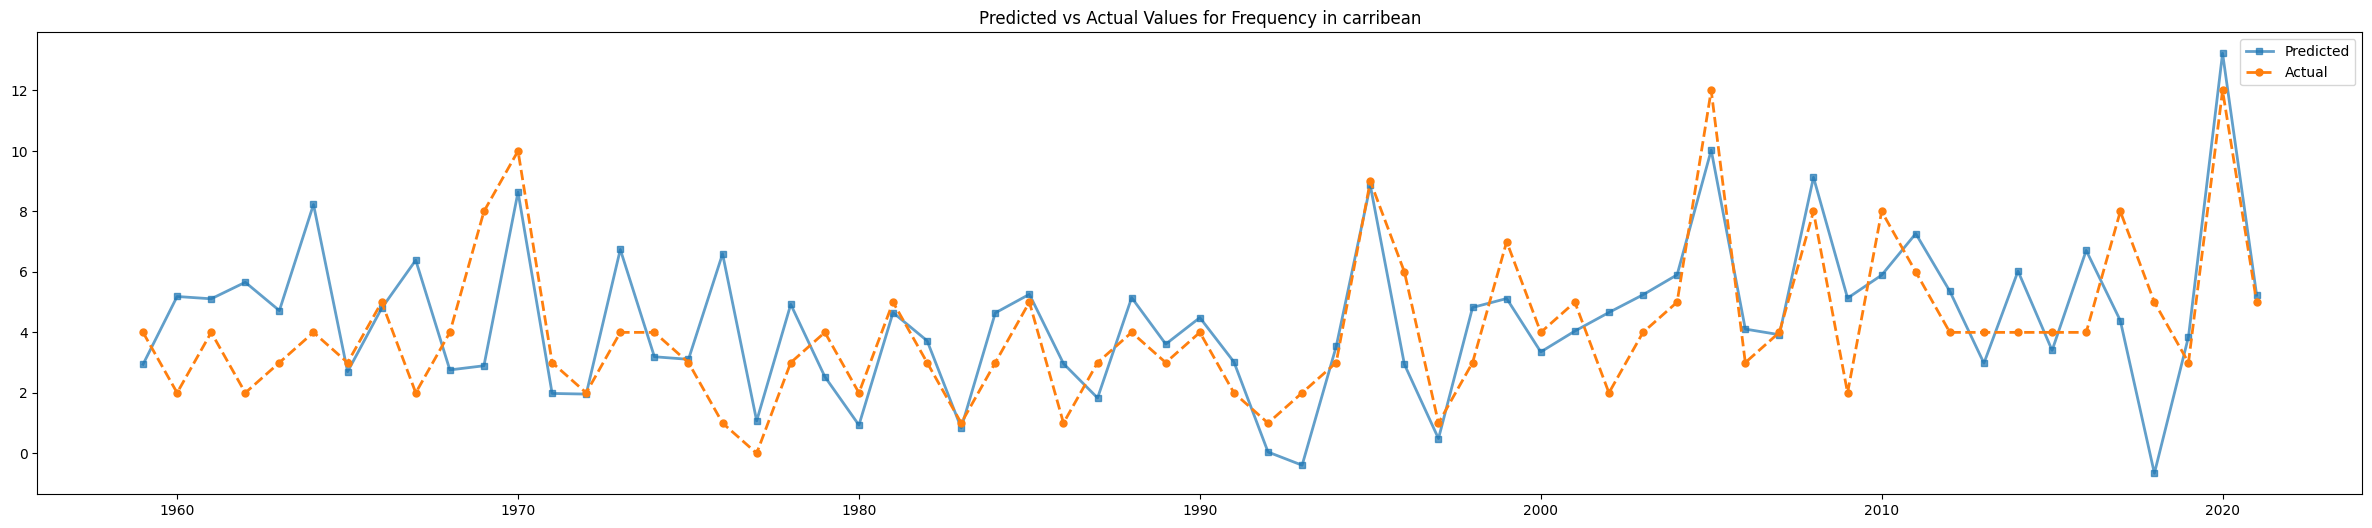

RMSE for y1: 2.165140691633222
Correlation for y1: 0.5692272651926422


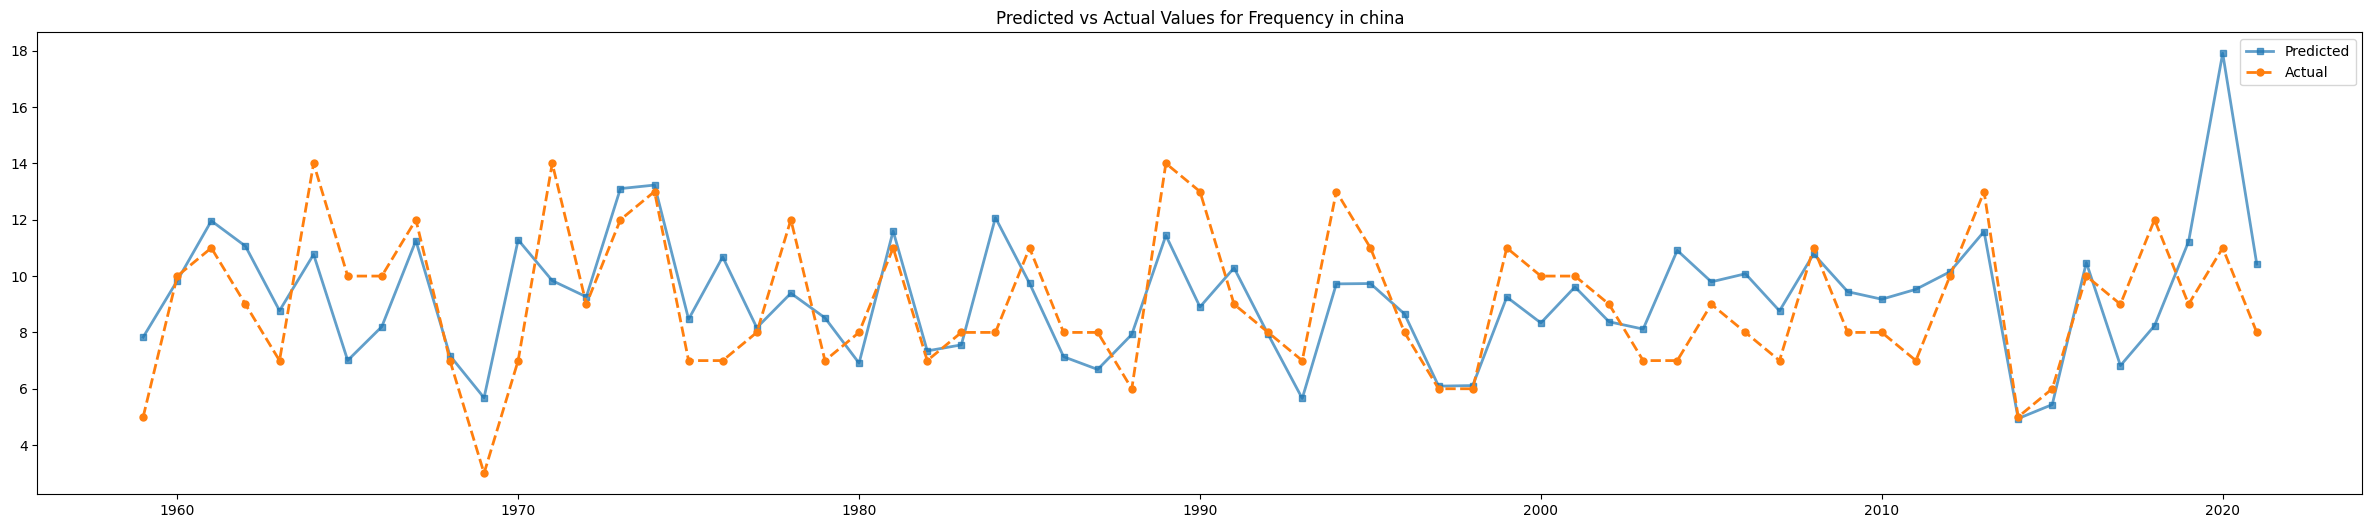

RMSE for y1: 2.5450395417824665
Correlation for y1: 0.5298655726164777


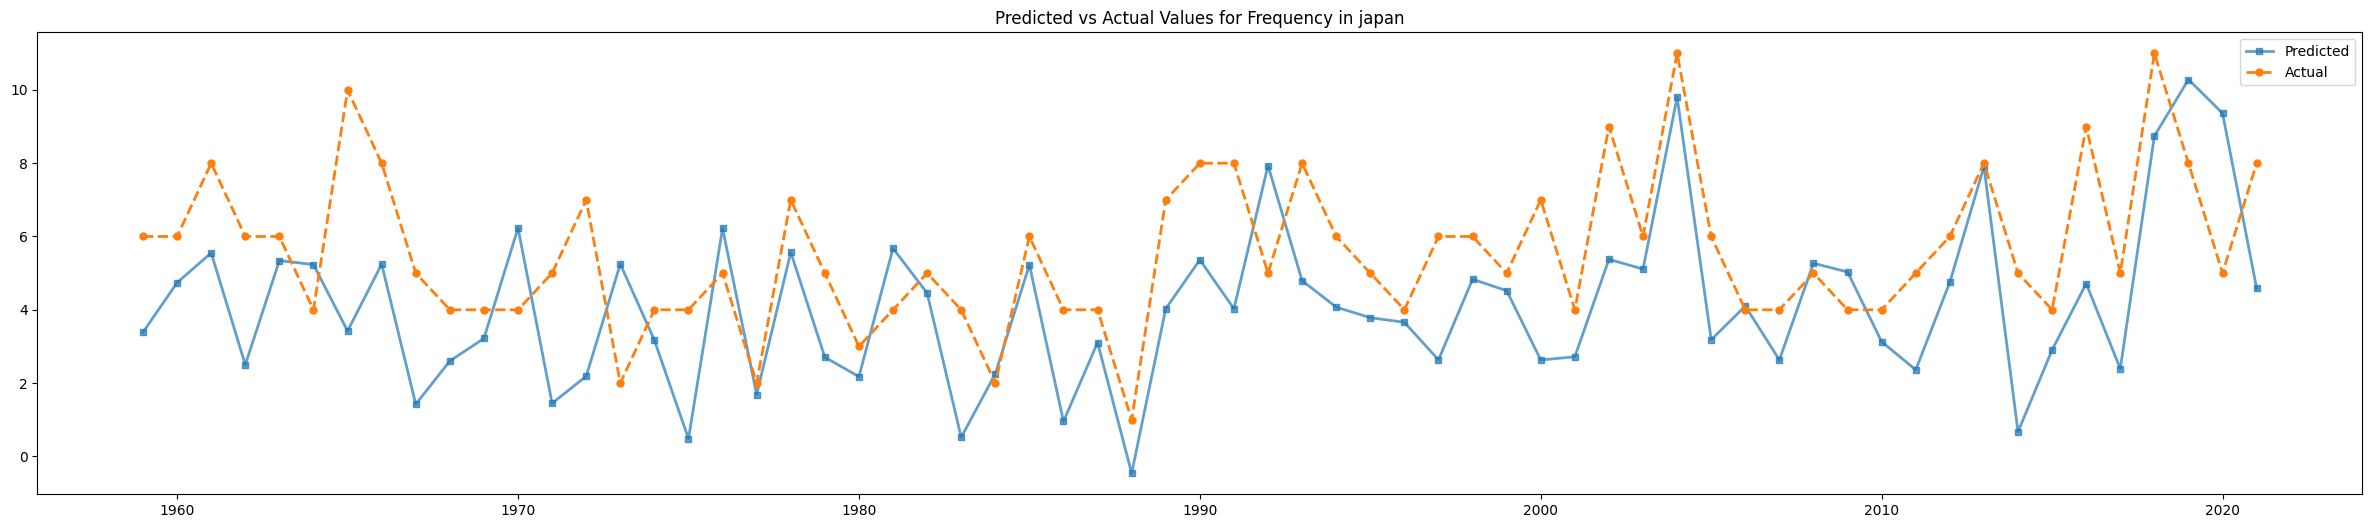

RMSE for y1: 2.4985603664885376
Correlation for y1: 0.6018513391579371


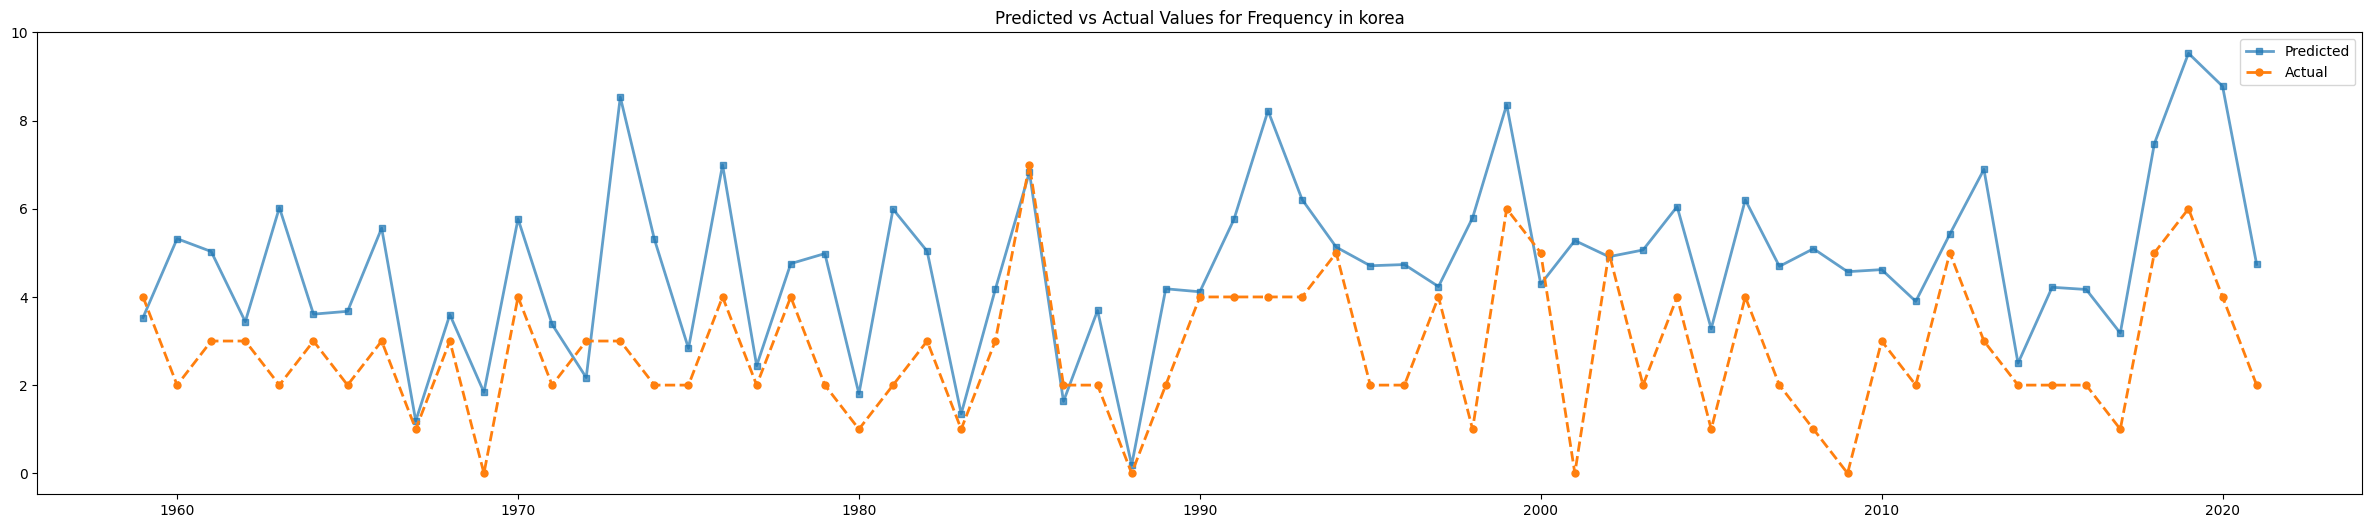

RMSE for y1: 2.1134197745456538
Correlation for y1: 0.4754275531717627


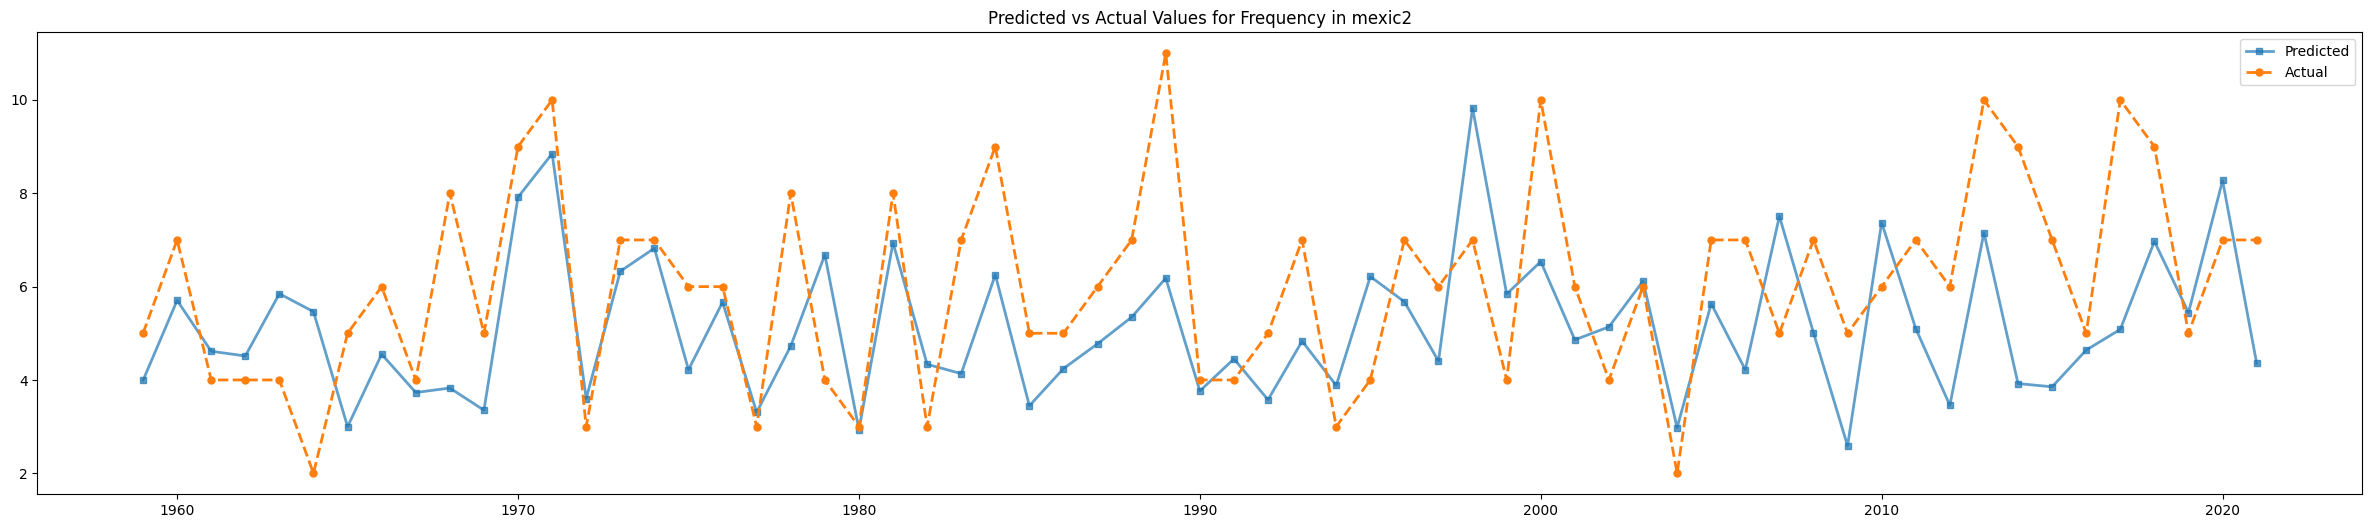

RMSE for y1: 2.3461439297061237
Correlation for y1: 0.5717047054746932


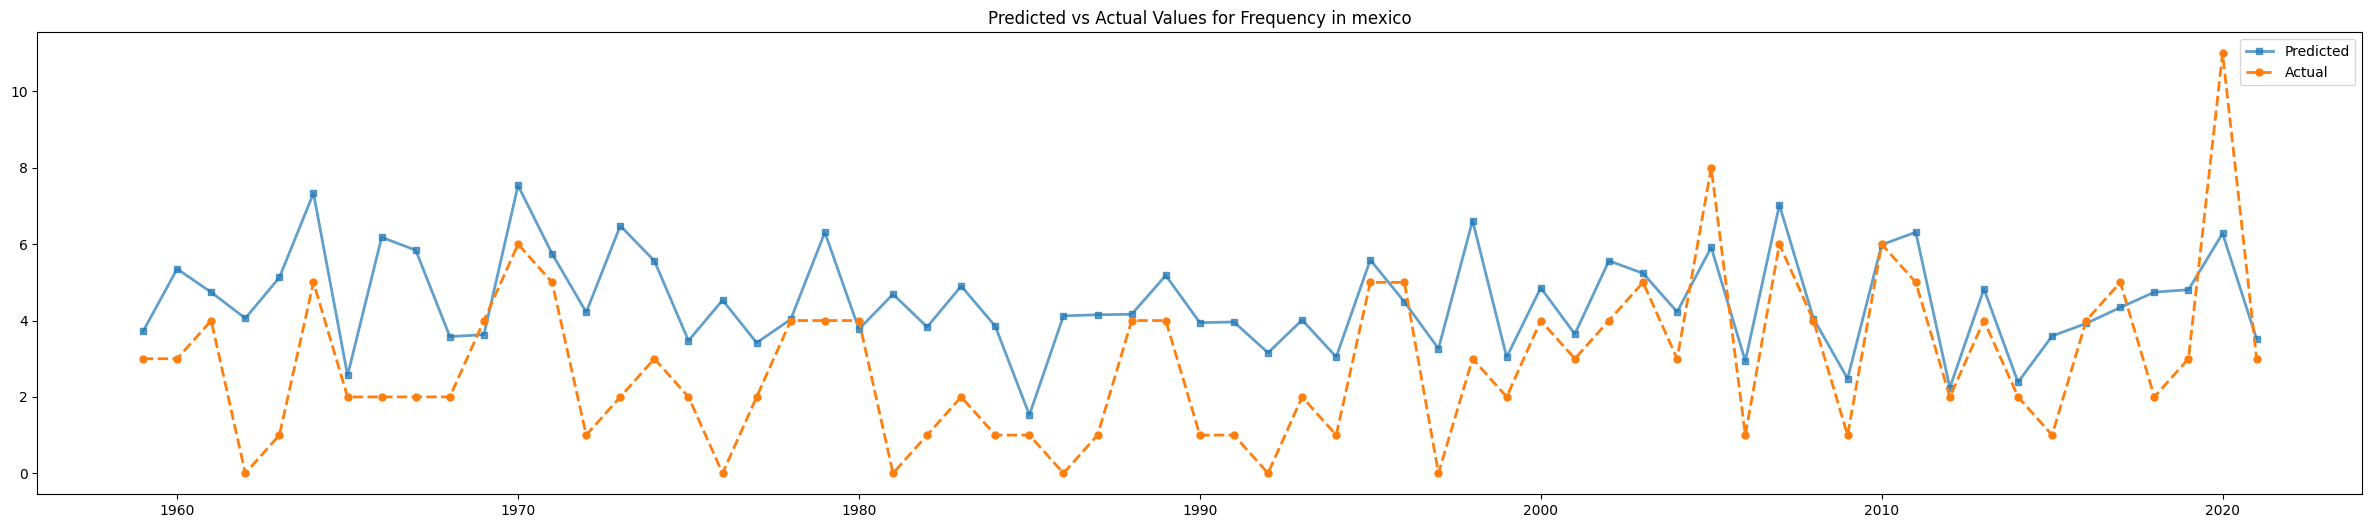

RMSE for y1: 6.172308785160805
Correlation for y1: 0.42706807212415016


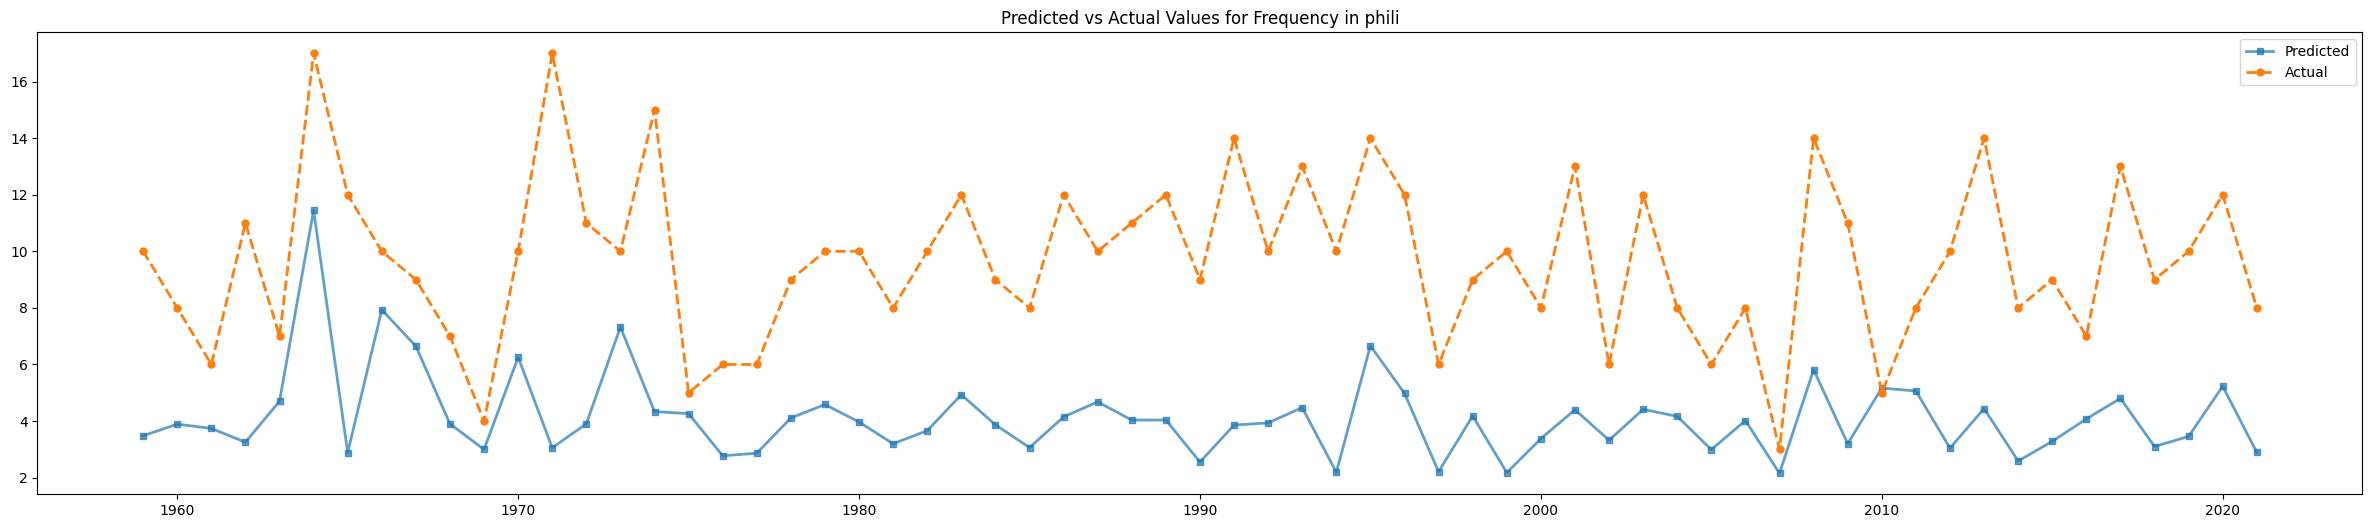

RMSE for y1: 2.7933324496477976
Correlation for y1: 0.21134692676497868


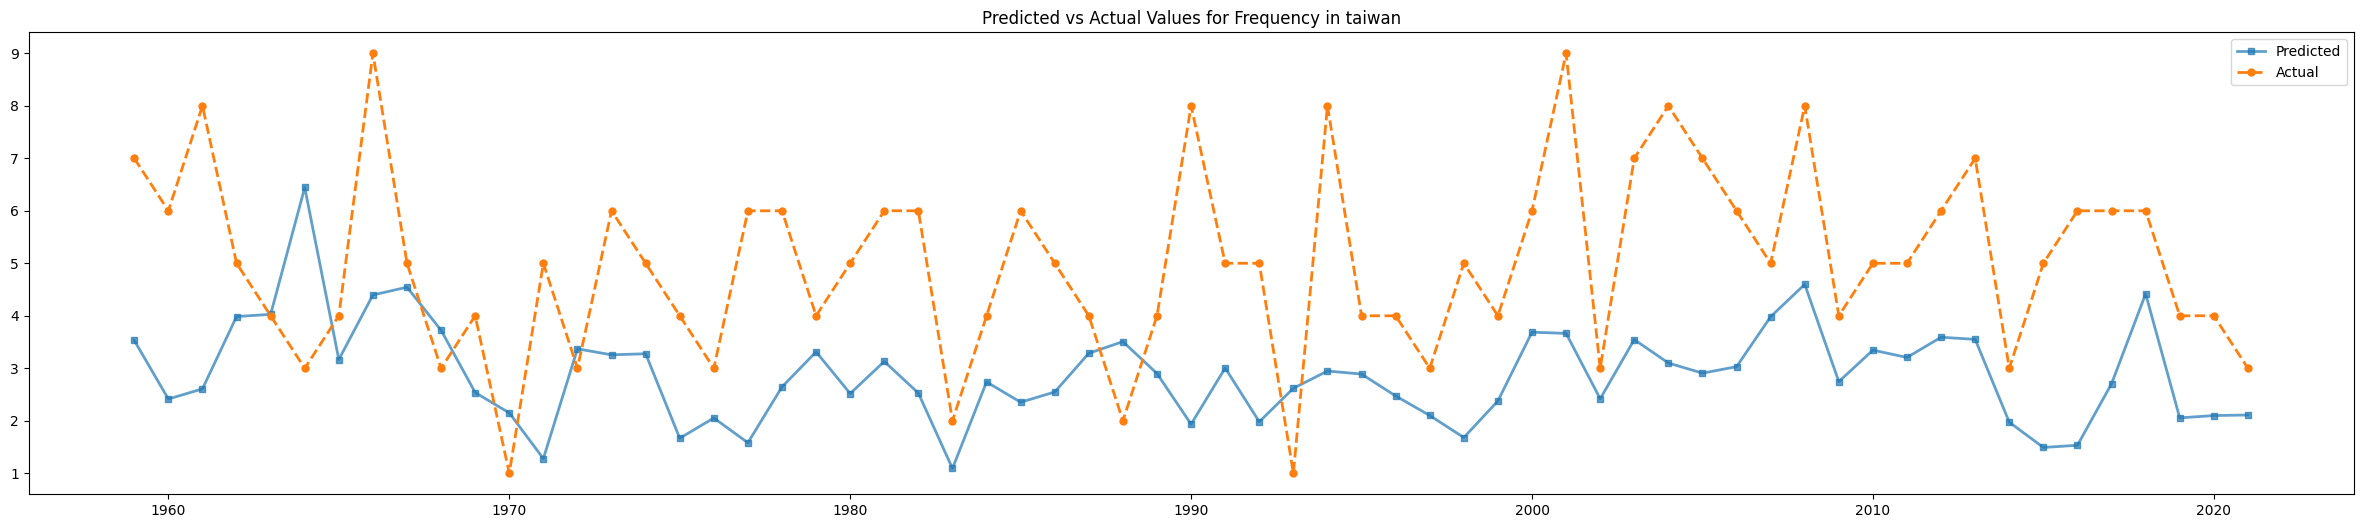

RMSE for y1: 2.9672770740671206
Correlation for y1: 0.16062636314473883


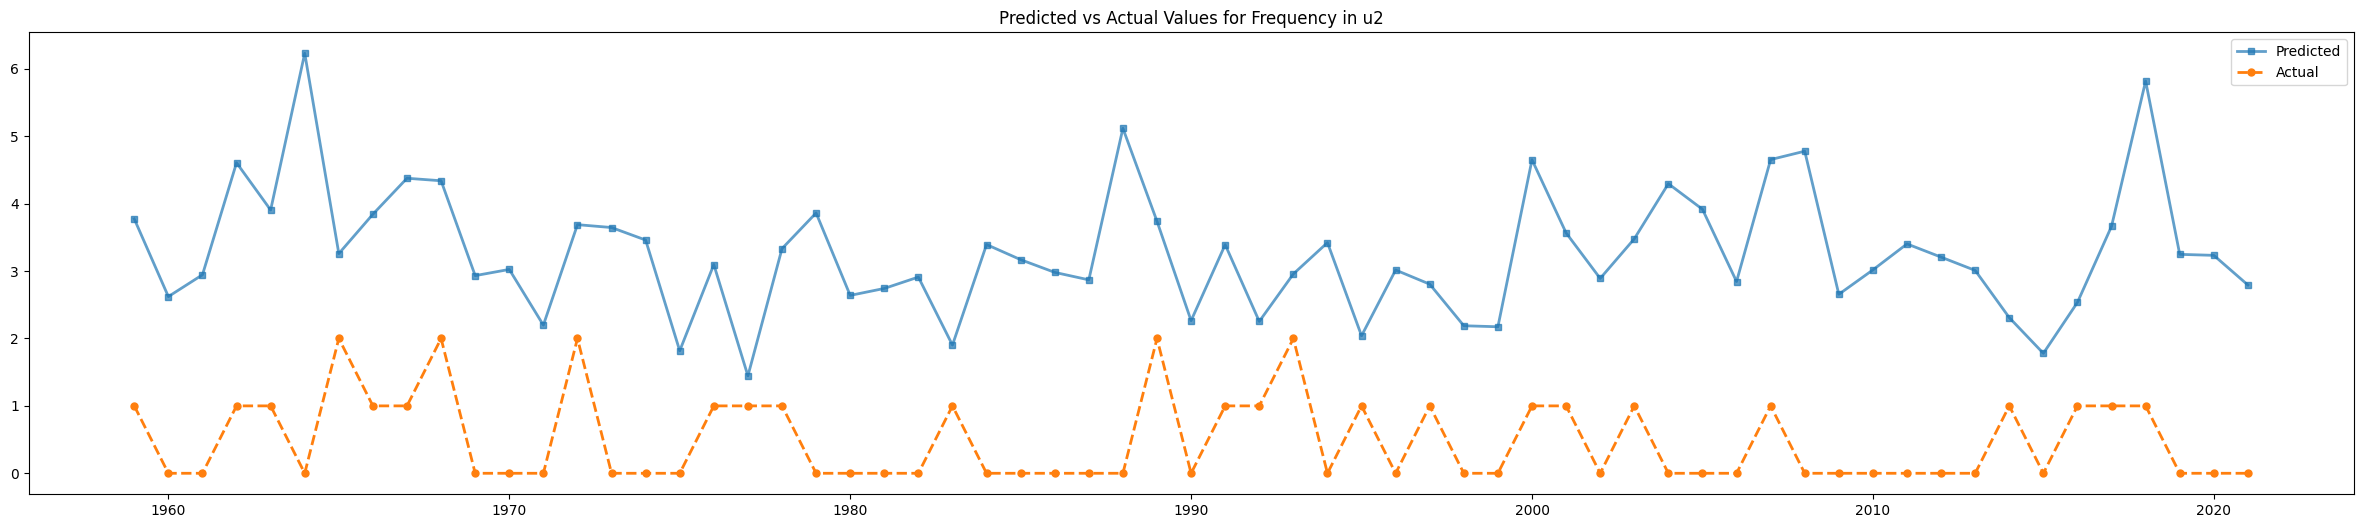

RMSE for y1: 2.254764366197399
Correlation for y1: 0.5612869798339043


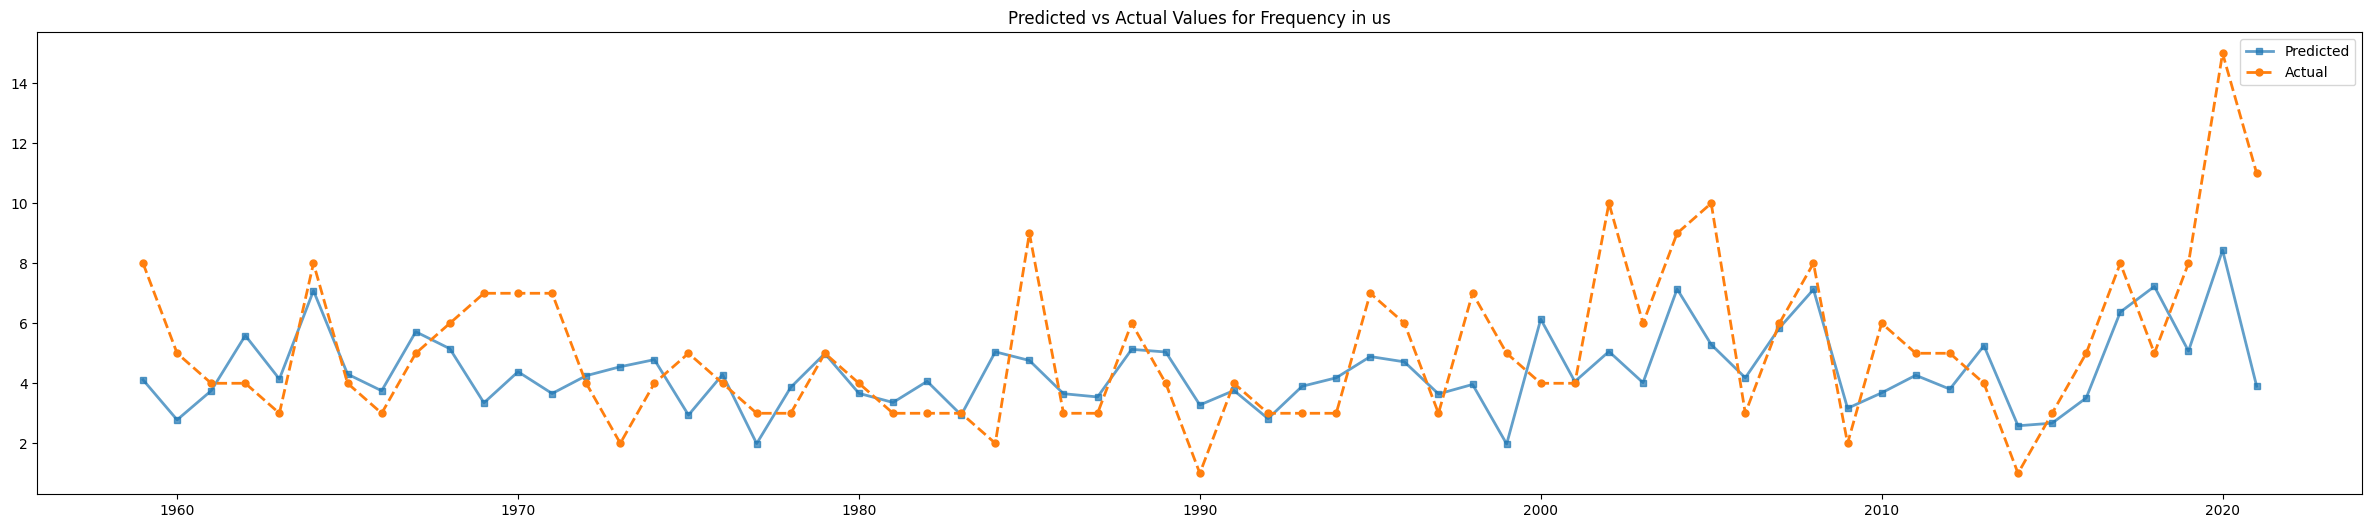

RMSE for y1: 2.1070062911208844
Correlation for y1: 0.4882542719657265


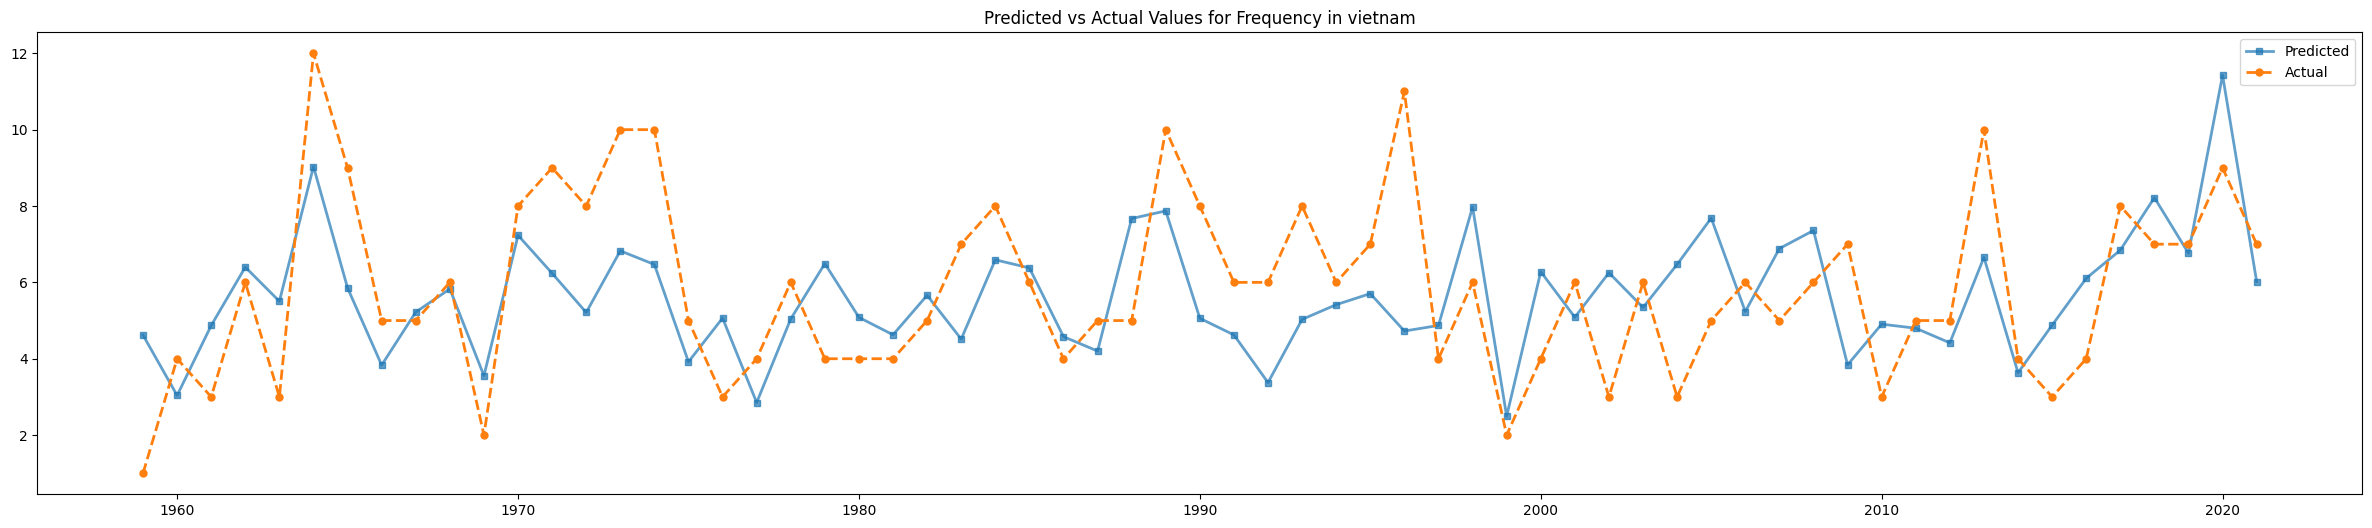

RMSE for y1: 1.8212752227907294
Correlation for y1: 0.31088627851625433


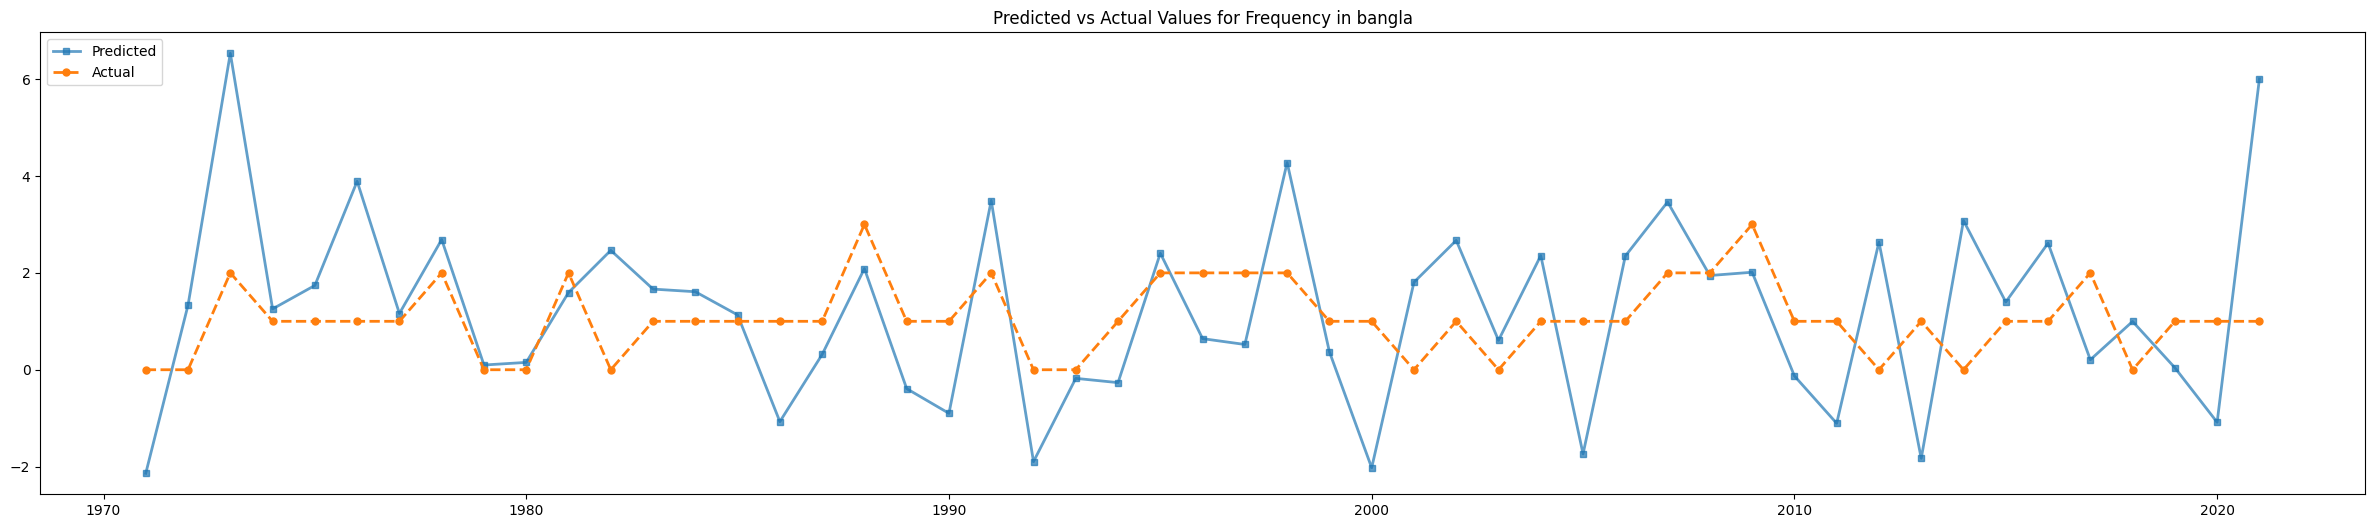

RMSE for y1: 2.2449471928101583
Correlation for y1: 0.3098778384088422


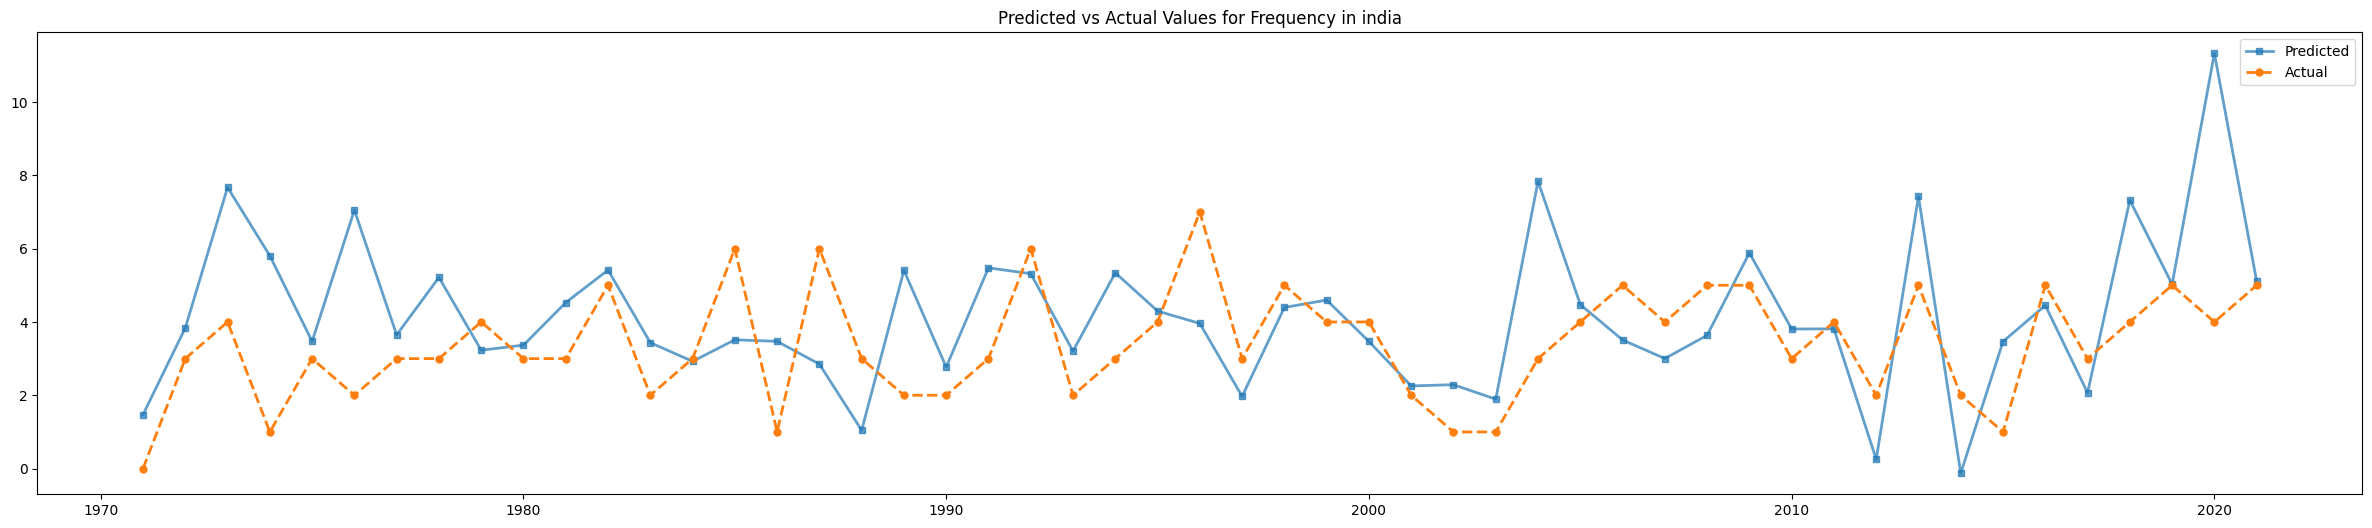

RMSE for y1: 3.0602210348915424
Correlation for y1: 0.11565962679422317


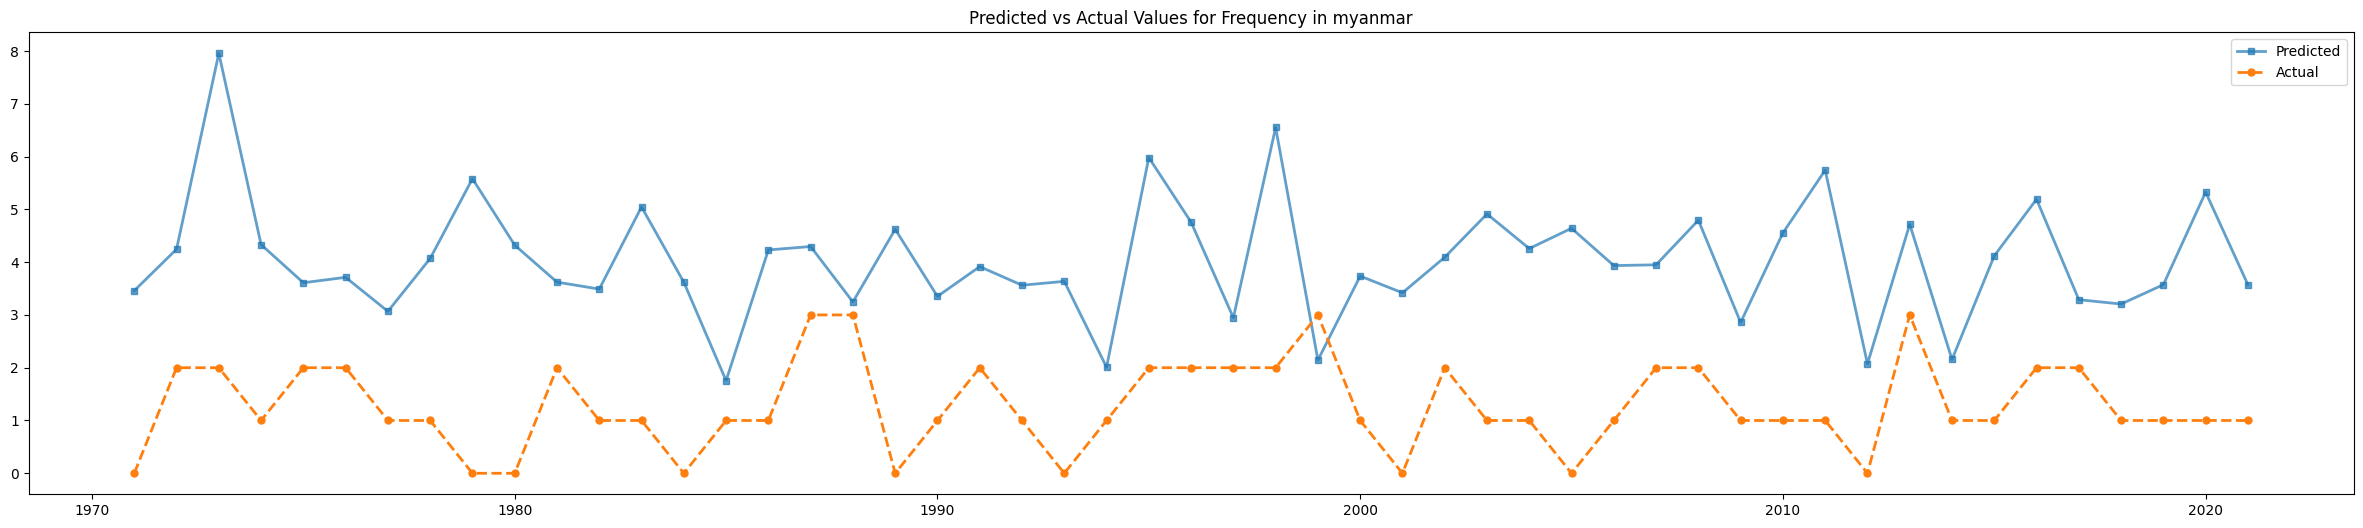

RMSE for y1: 2.7991577265648866
Correlation for y1: -0.11396225643676819


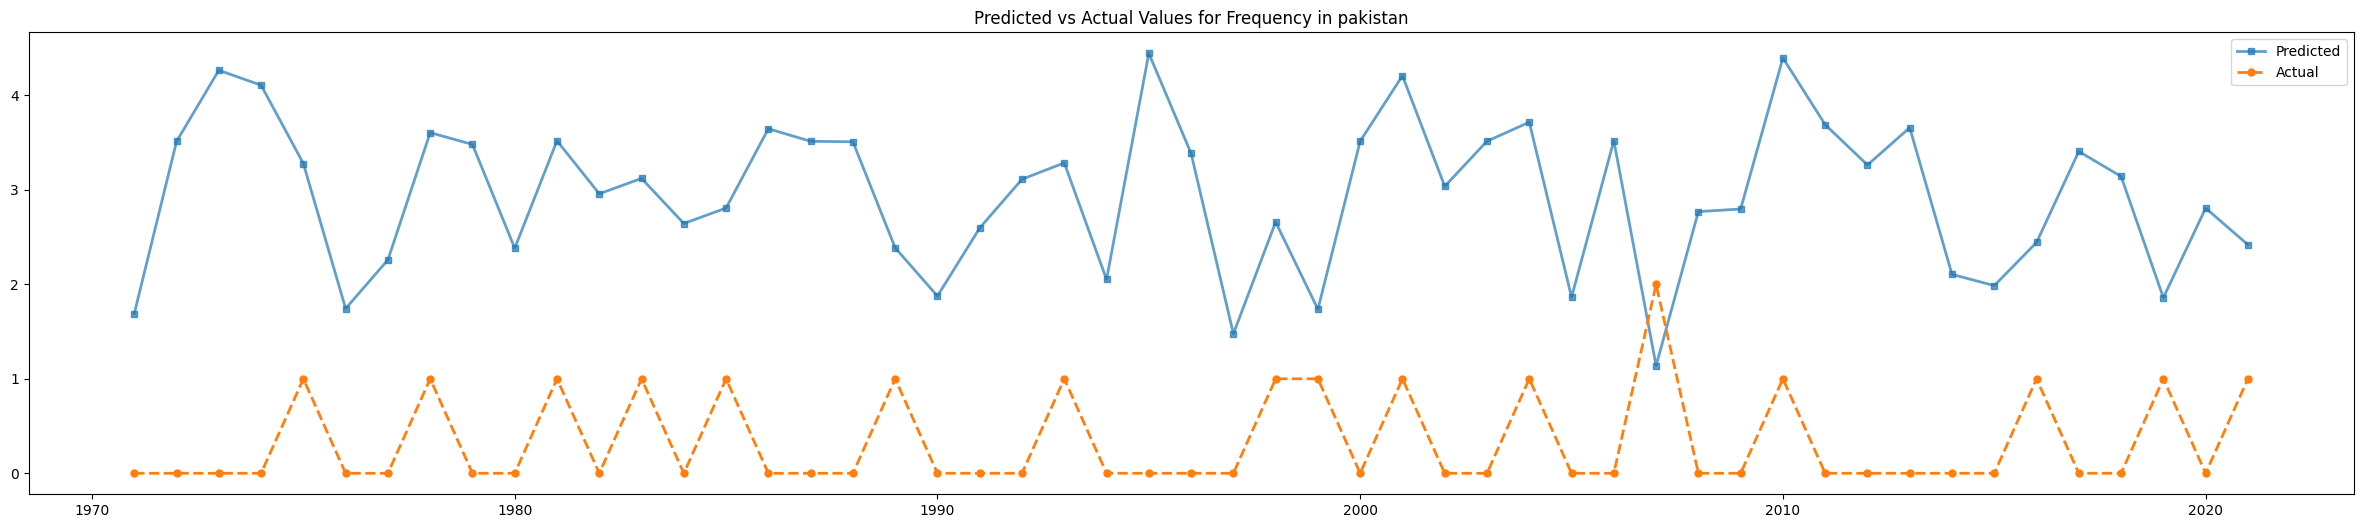

RMSE for y1: 2.039261768104223
Correlation for y1: 0.11192294212937572


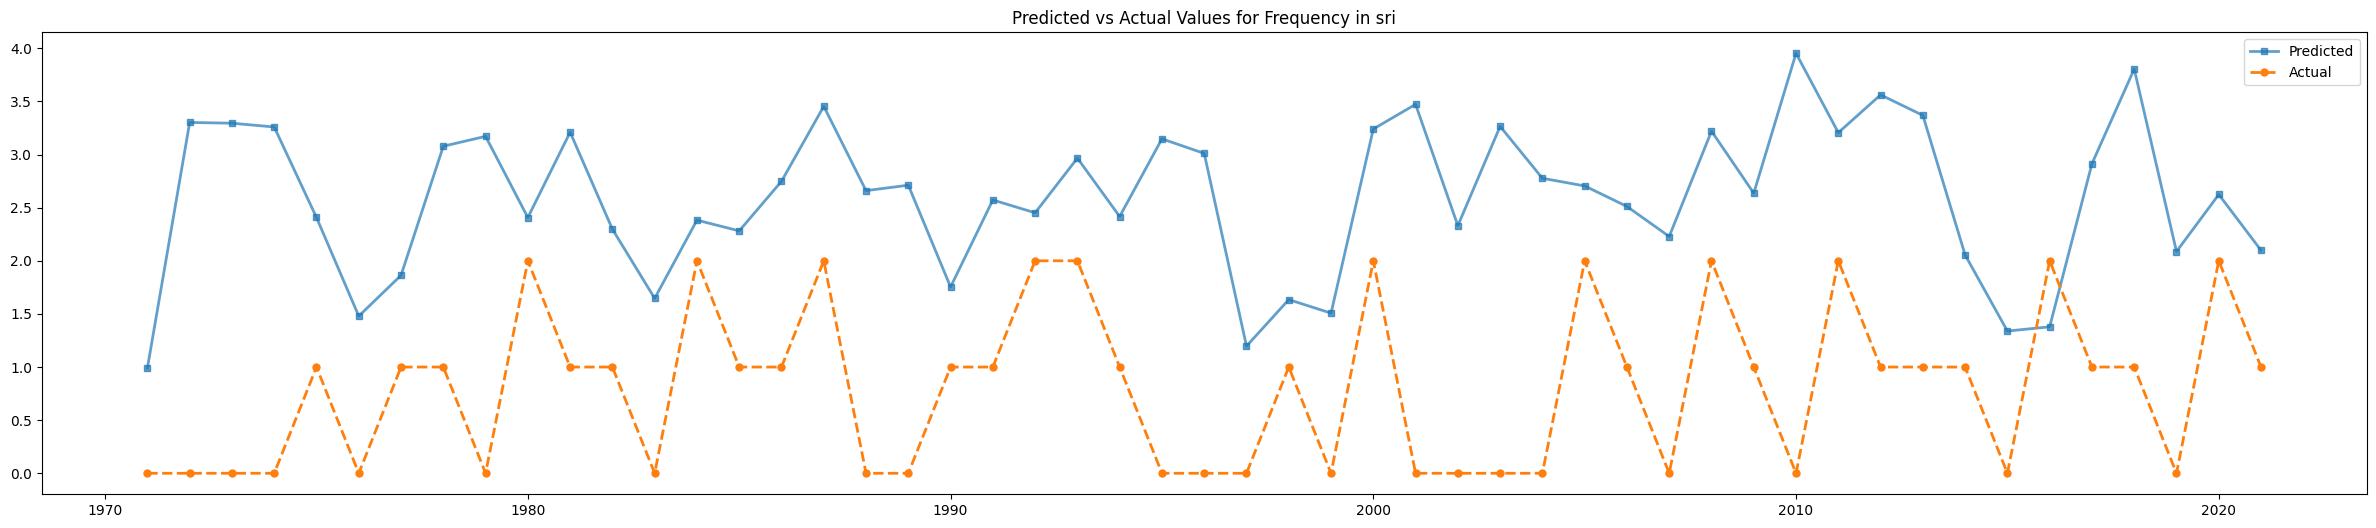

RMSE for y1: 2.070310129438649
Correlation for y1: 0.5957790167860971


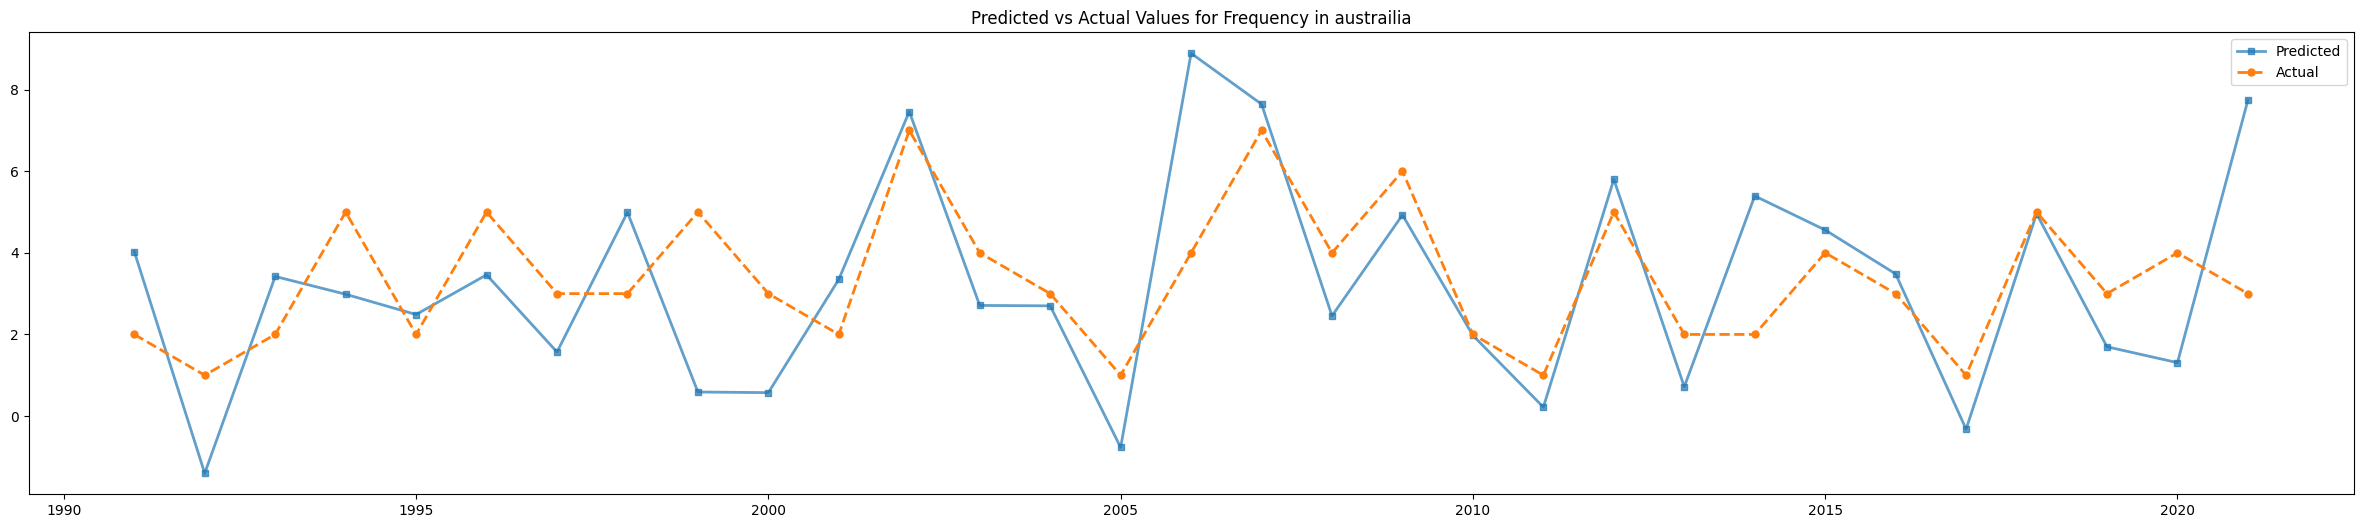

RMSE for y1: 1.8462589953053428
Correlation for y1: 0.7294439844249652


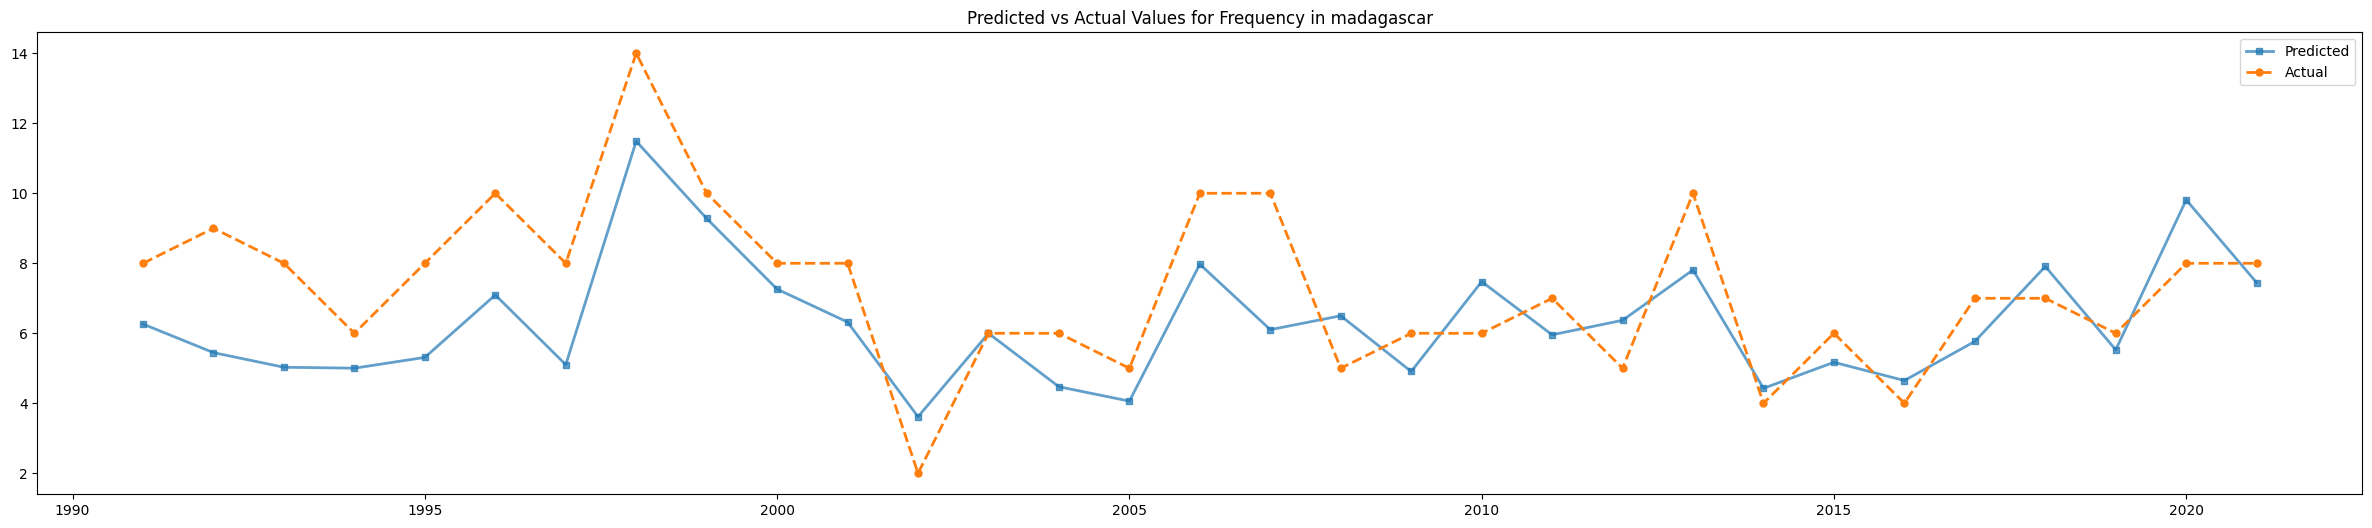

In [ ]:
# Load the predictions from the CSV file
y1_pred_df = pd.read_csv('y_pred_ANN_freq3.csv')

# Plot the predictions and actual values for y1 by country and month
countries = y1_pred_df['country'].unique()

for country in countries:
    country_pred_df = y1_pred_df[y1_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'y1_actual': 'sum', 'y1_pred': 'sum'}).reset_index()
    rmse_1 = np.sqrt(mean_squared_error(country_pred_df['y1_actual'], country_pred_df['y1_pred']))
    print("RMSE for y1:", rmse_1)
    corr = country_pred_df['y1_actual'].corr(country_pred_df['y1_pred'])
    print("Correlation for y1:", corr)
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['y1_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.plot(country_pred_df['year'], country_pred_df['y1_actual'], label="Actual", linewidth=2, linestyle='--', marker='o', markersize=5, alpha=1)
    plt.title(f"Predicted vs Actual Values for Frequency in {country}")
    plt.legend()
    plt.show()


RMSE for y2: 63.838989120720676
Correlation for y2: 0.574785359263226


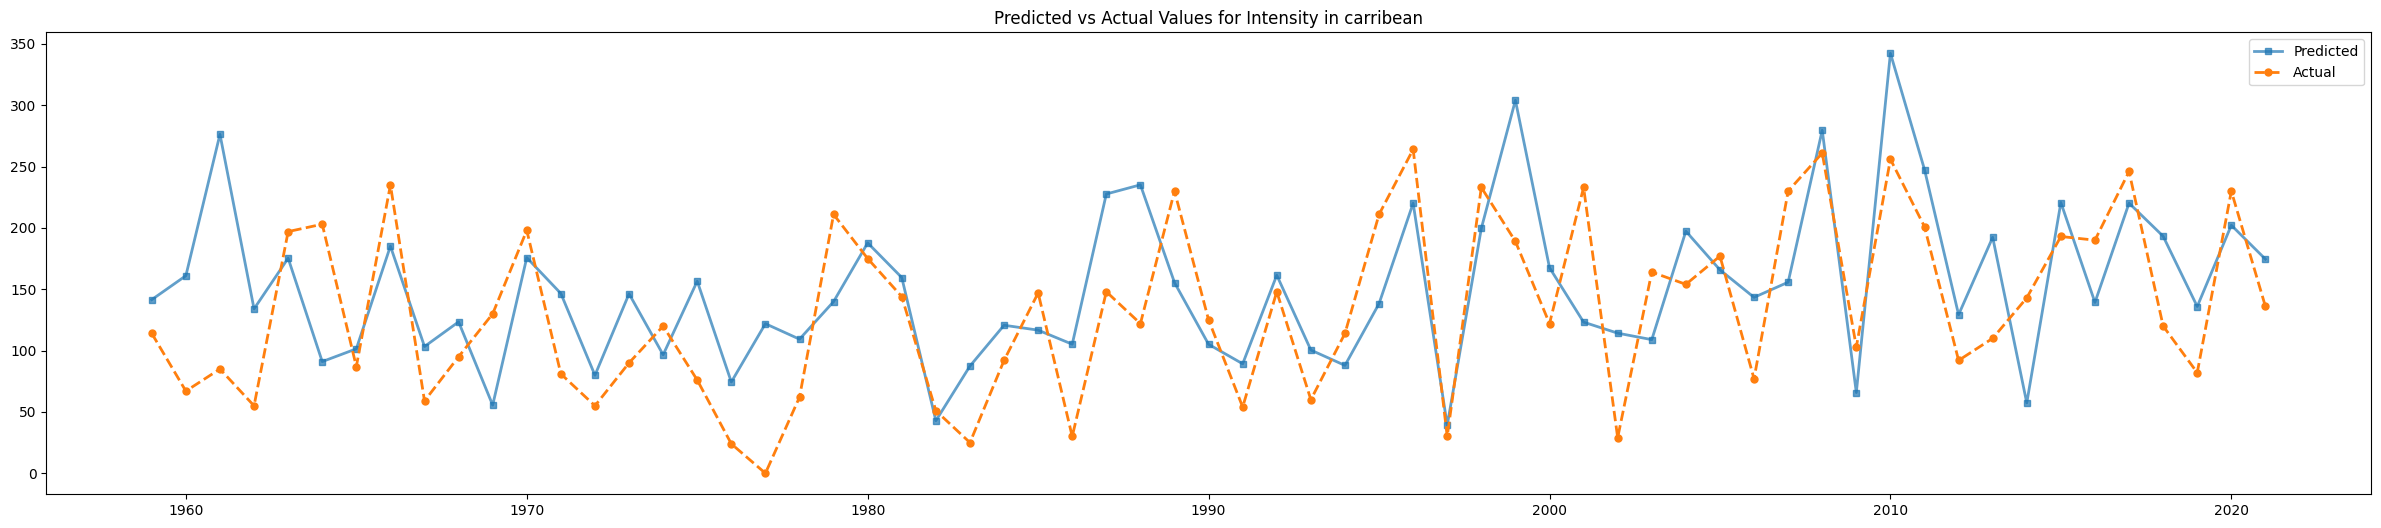

RMSE for y2: 68.11145369439416
Correlation for y2: 0.519826900359427


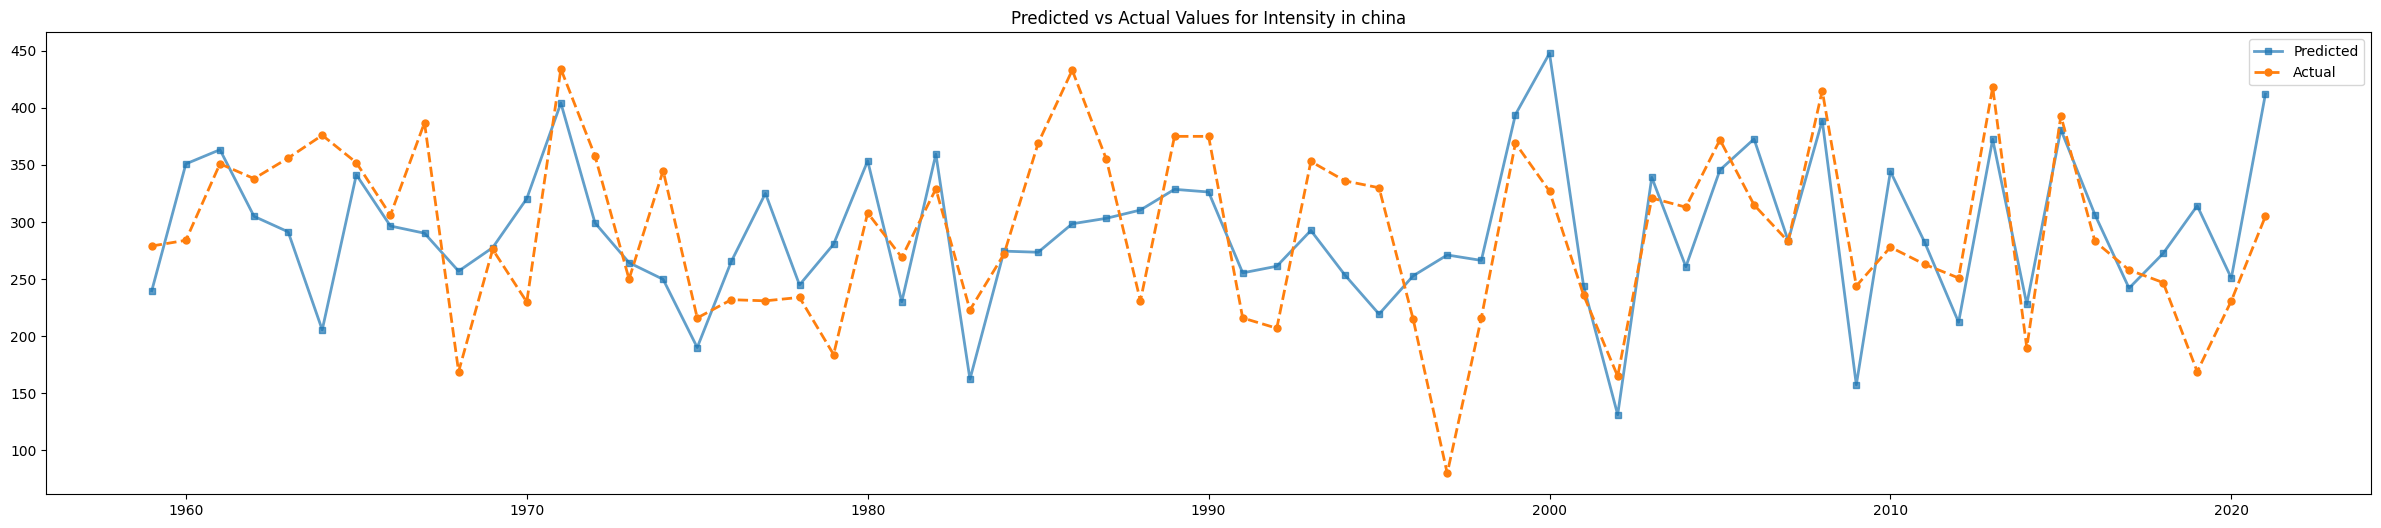

RMSE for y2: 66.07308667346517
Correlation for y2: 0.5703672024145986


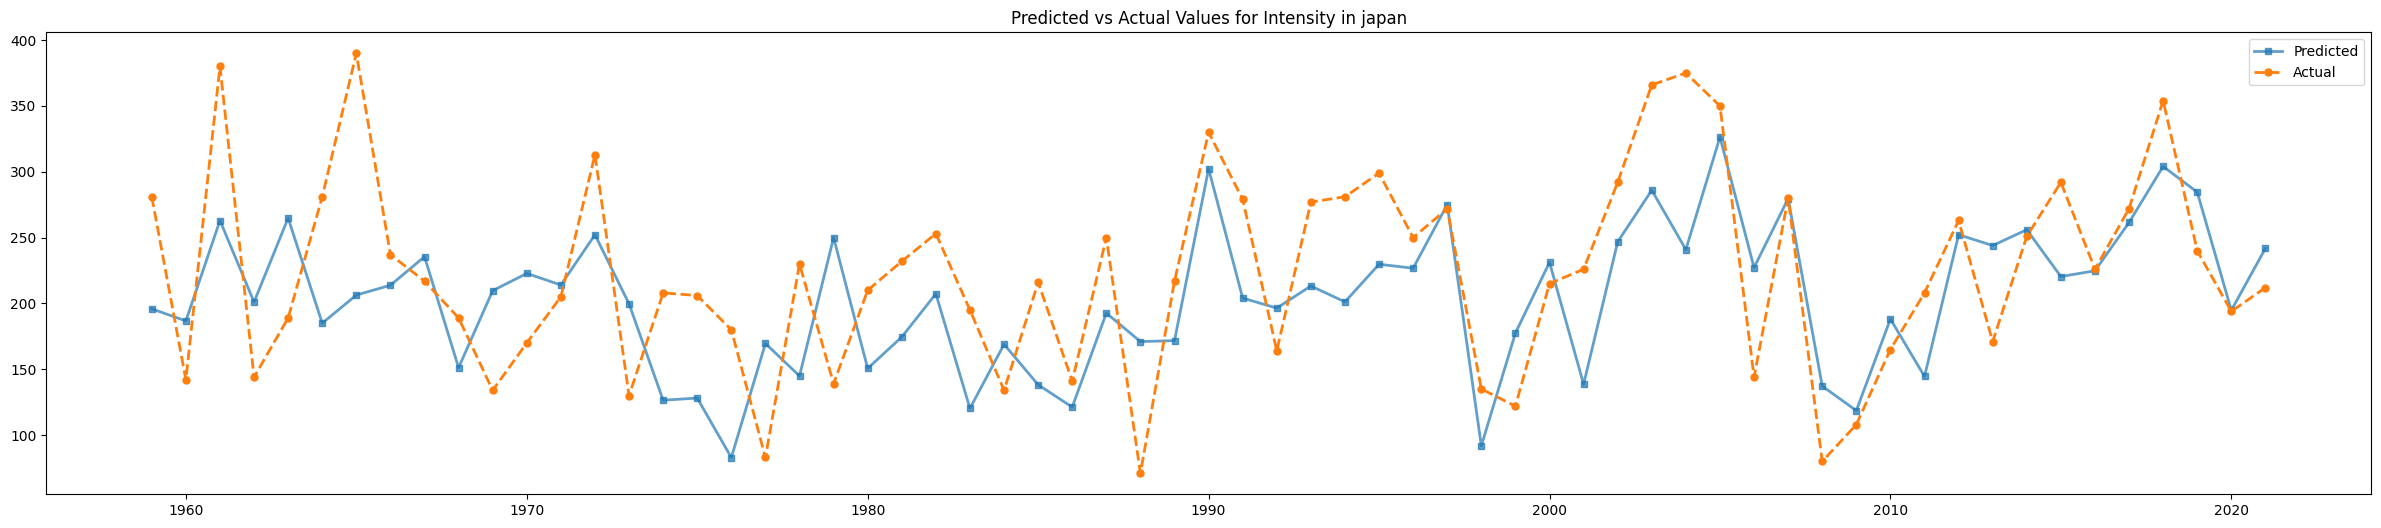

RMSE for y2: 81.38062317987938
Correlation for y2: 0.16577530019224898


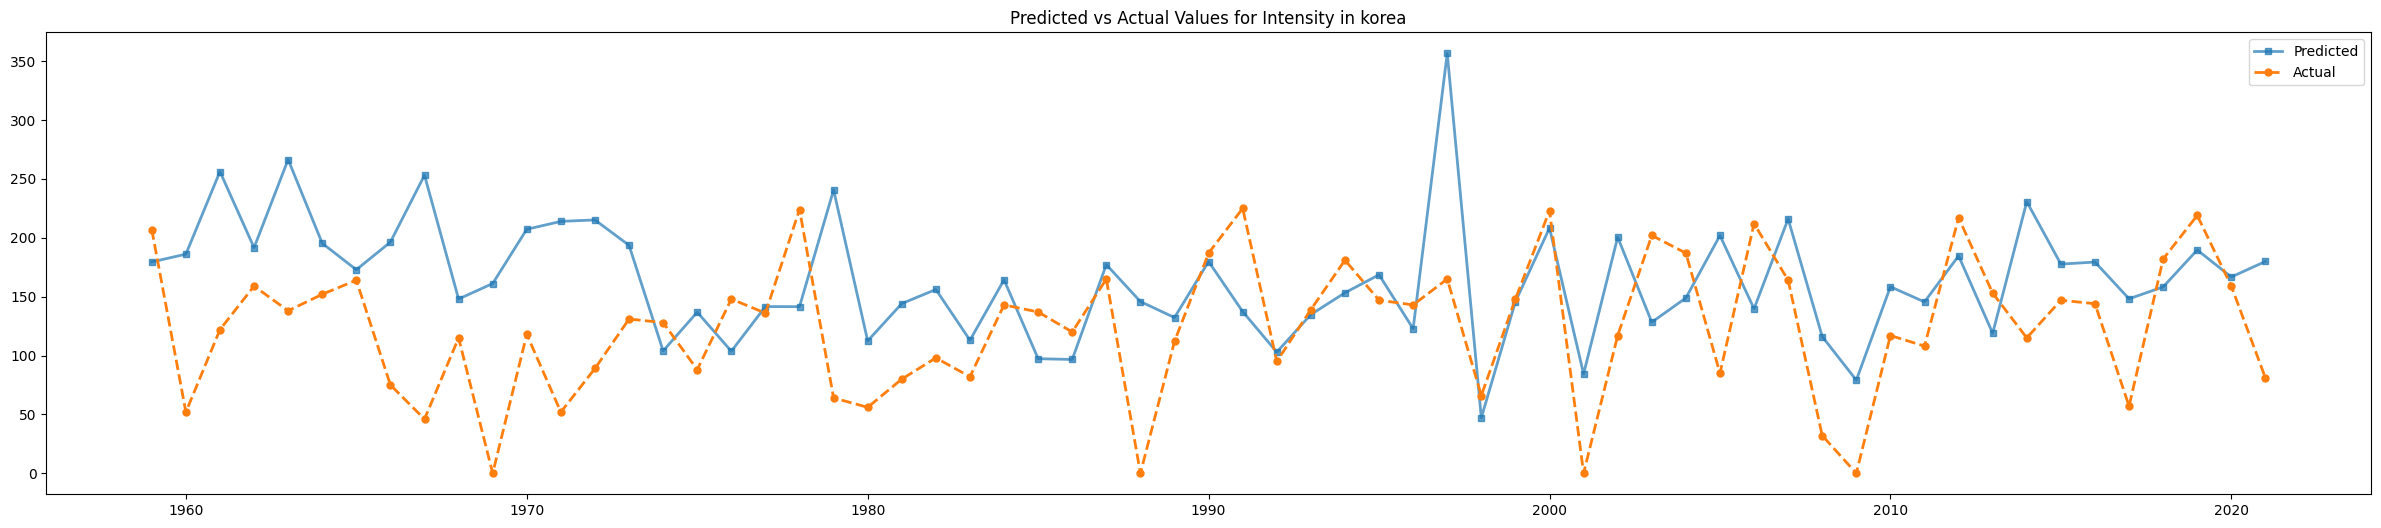

RMSE for y2: 64.41589440992571
Correlation for y2: 0.3097206368311071


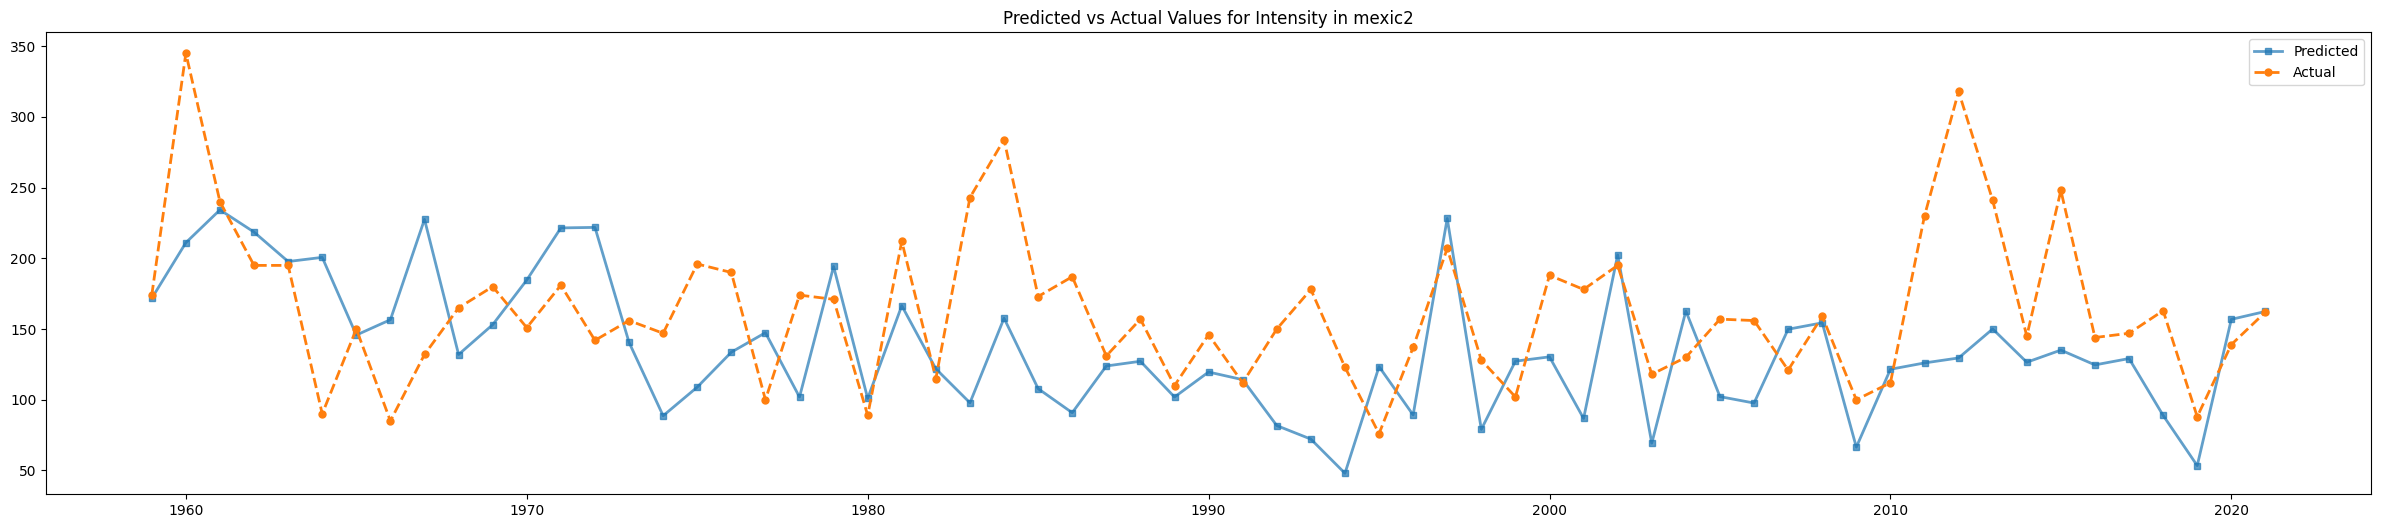

RMSE for y2: 86.55075152850245
Correlation for y2: 0.2757459400928937


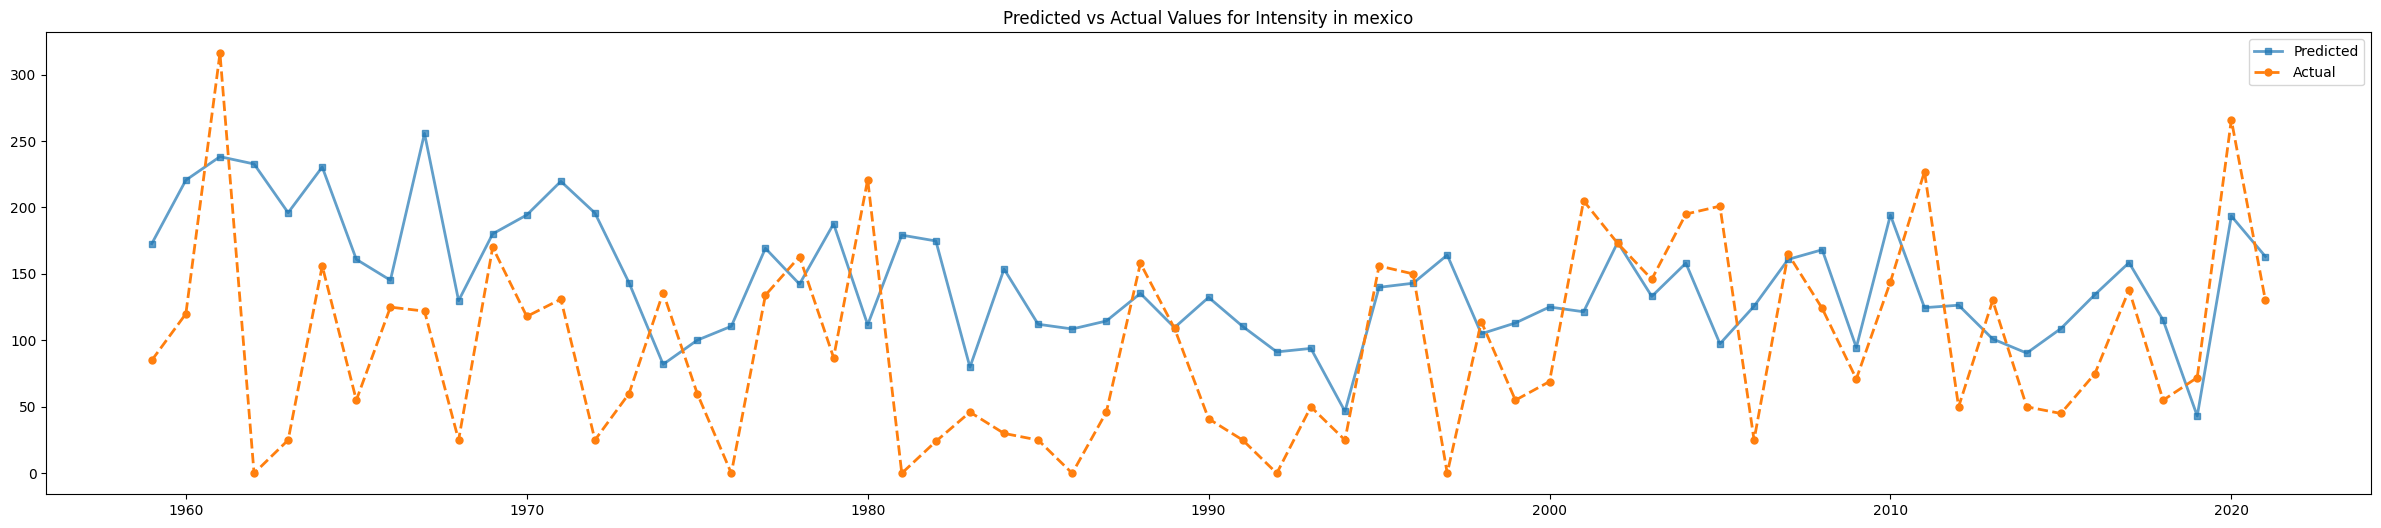

RMSE for y2: 198.2016227928946
Correlation for y2: 0.4442796292118252


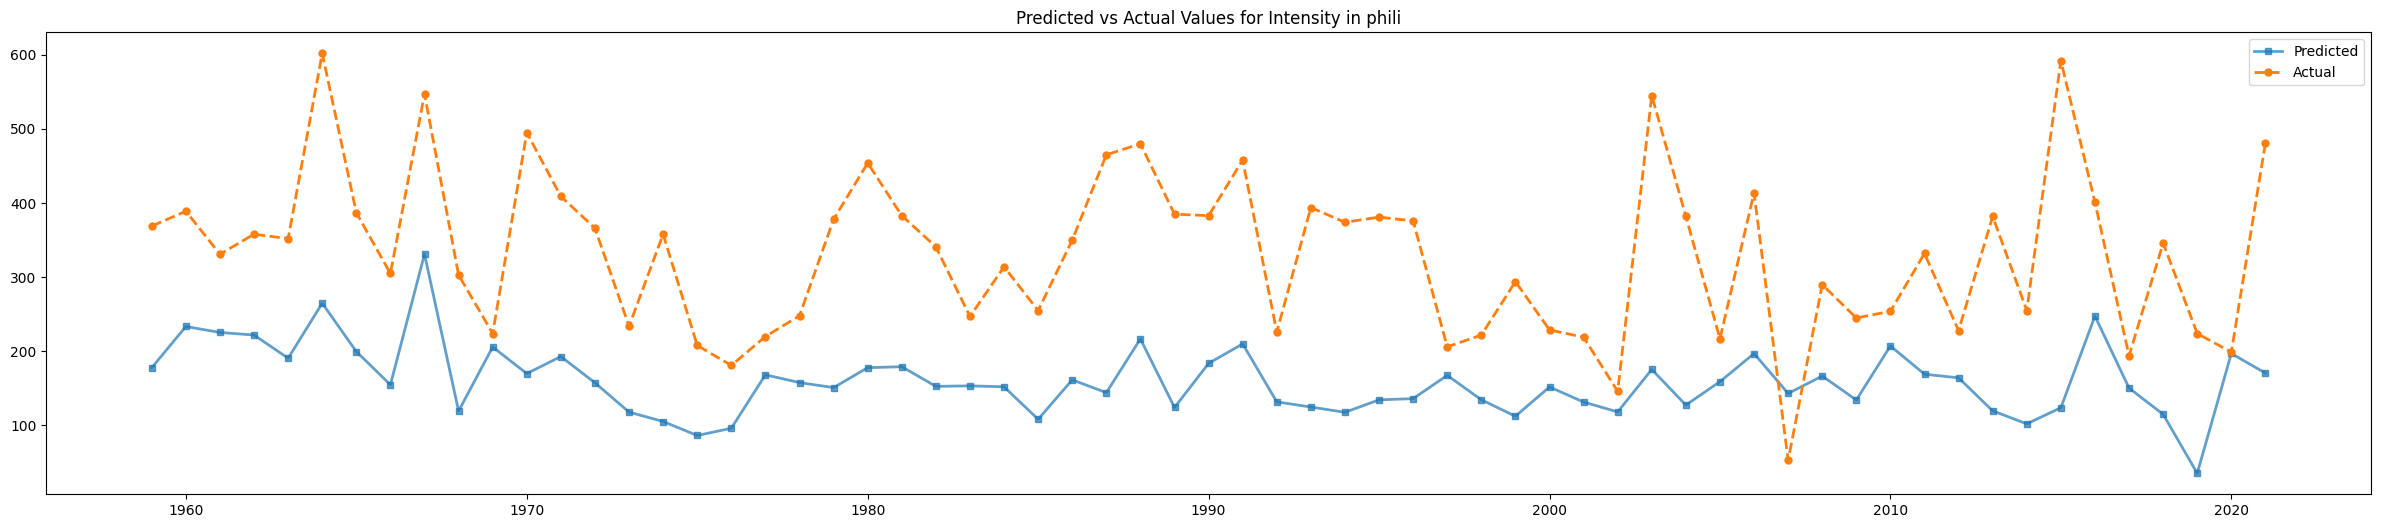

RMSE for y2: 137.06646644767375
Correlation for y2: 0.4585096832254575


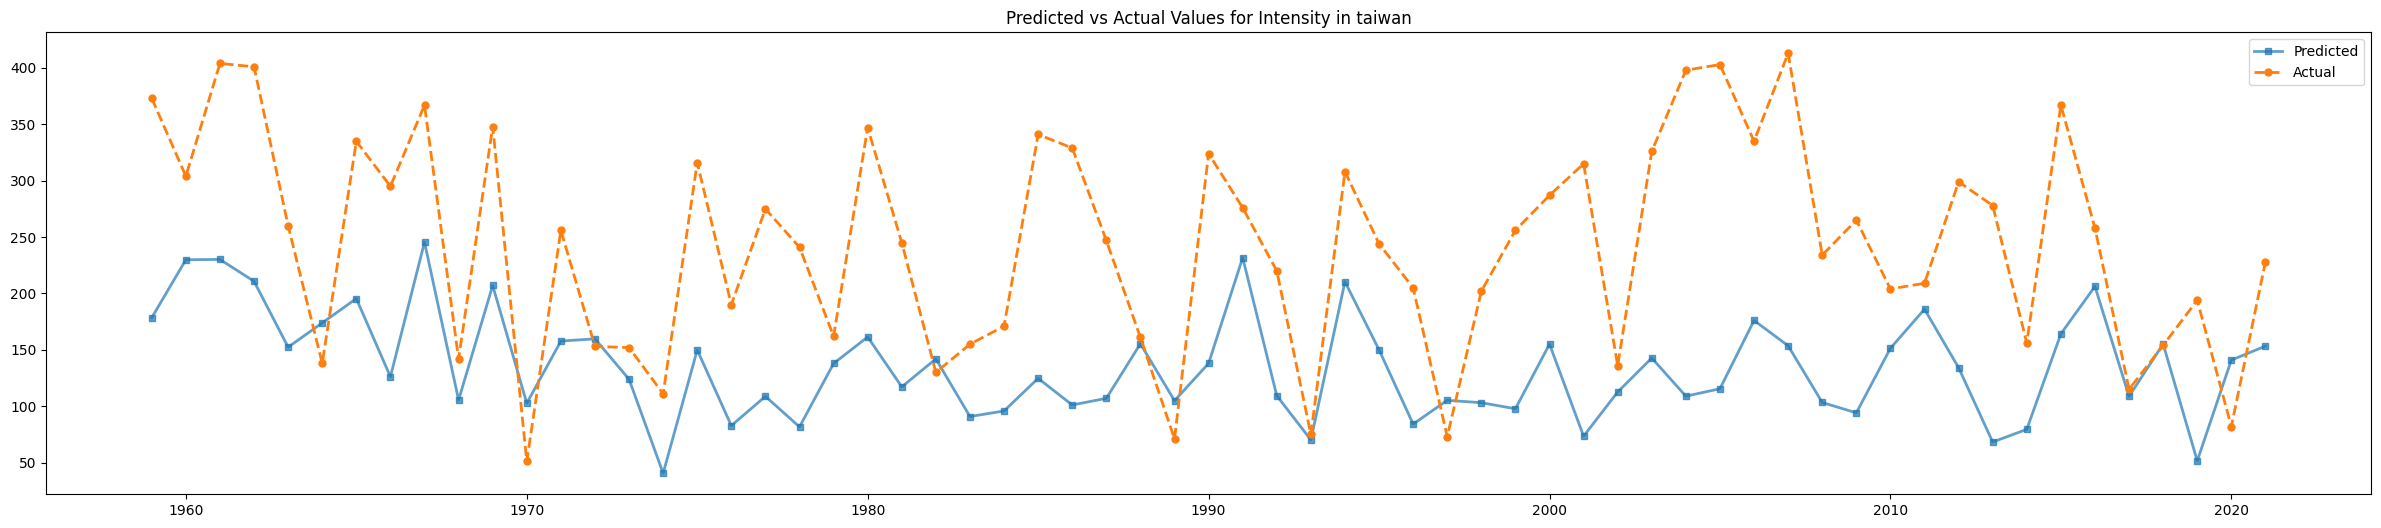

RMSE for y2: 127.97176891736086
Correlation for y2: 0.09984536576862893


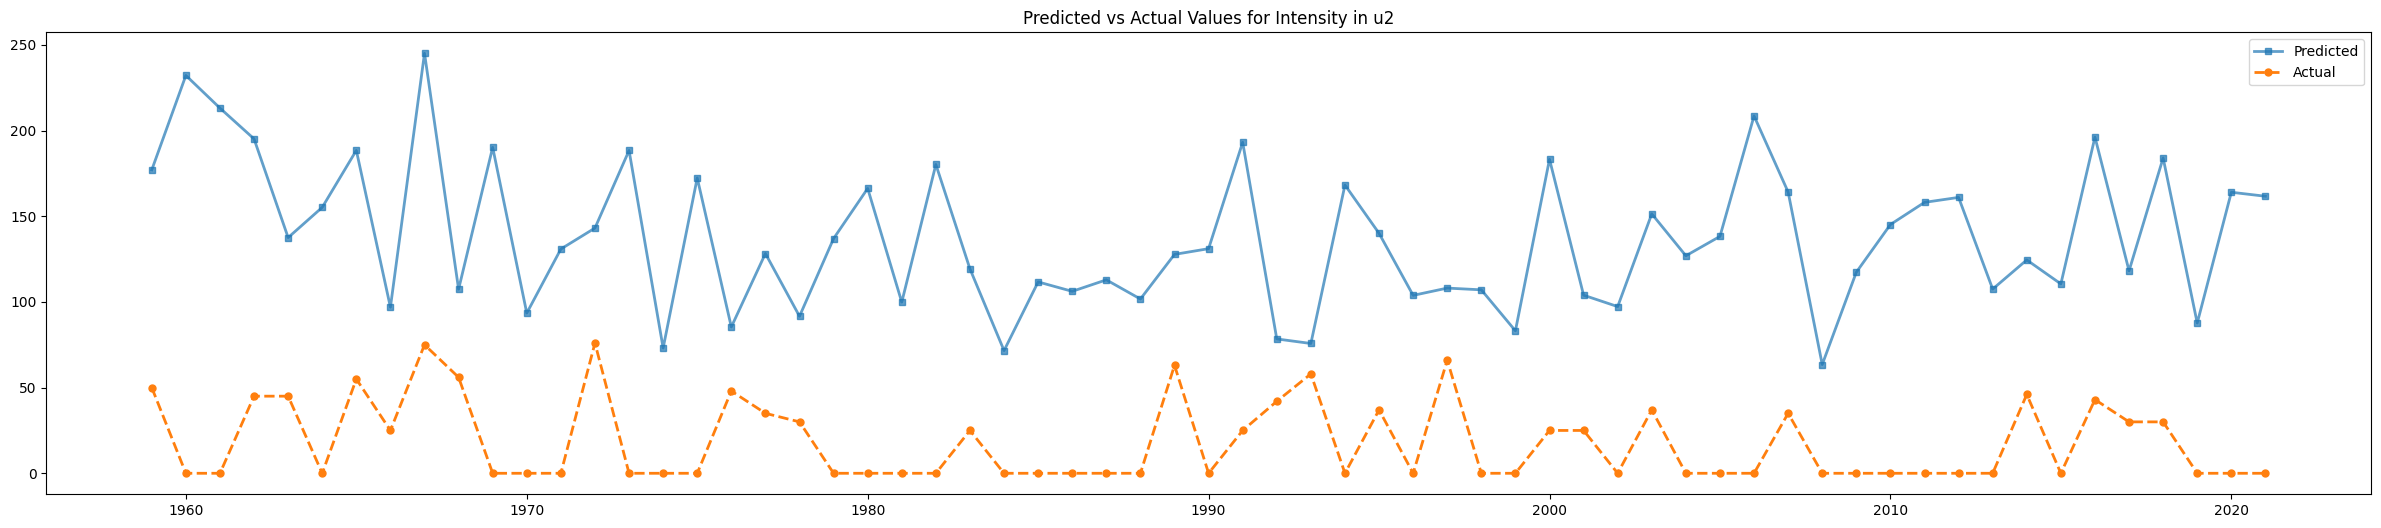

RMSE for y2: 70.62968829317346
Correlation for y2: 0.32107289669584926


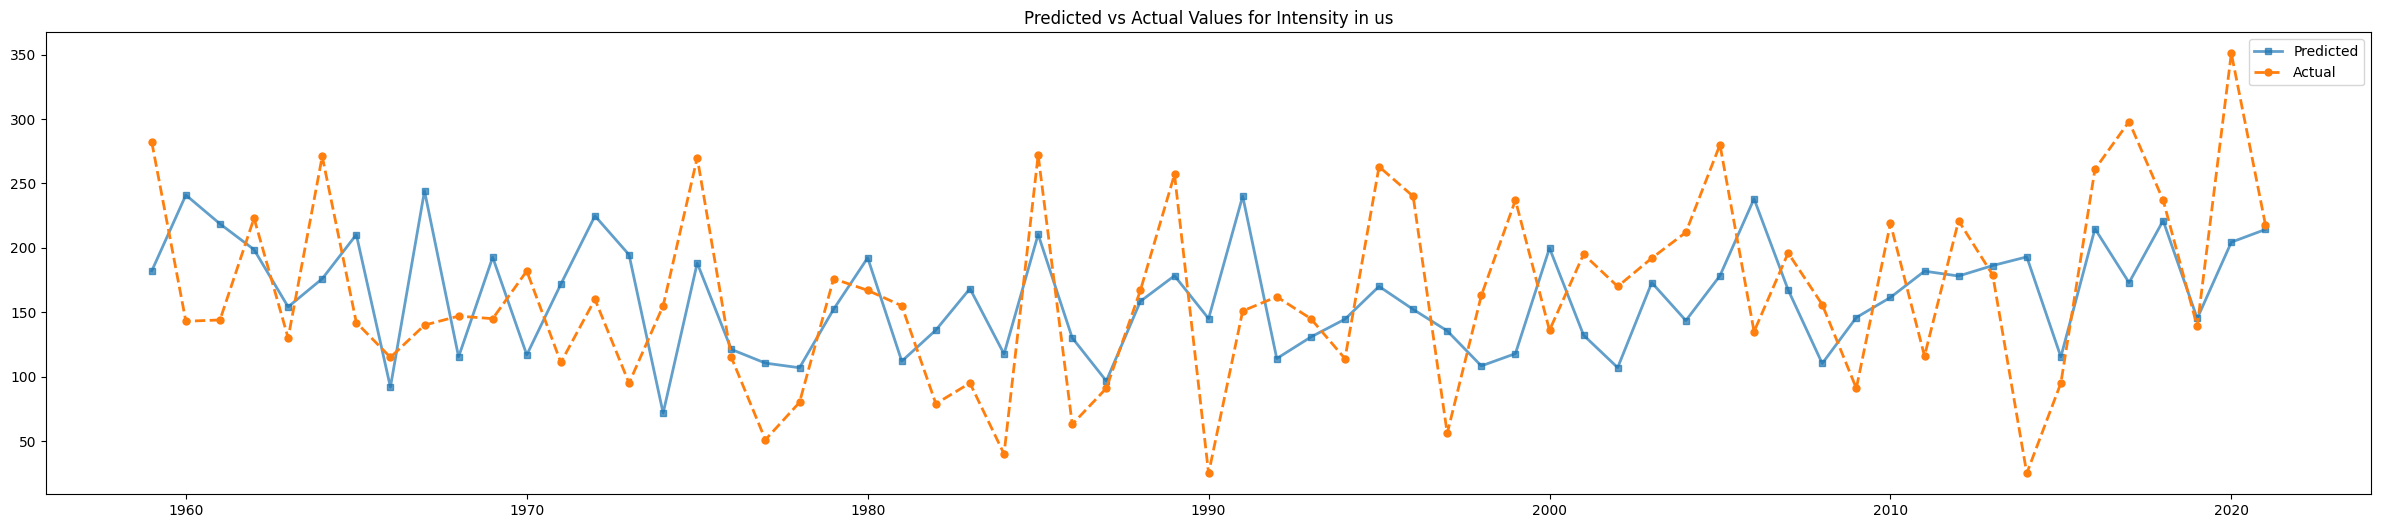

RMSE for y2: 66.71400078746944
Correlation for y2: 0.5223250972904226


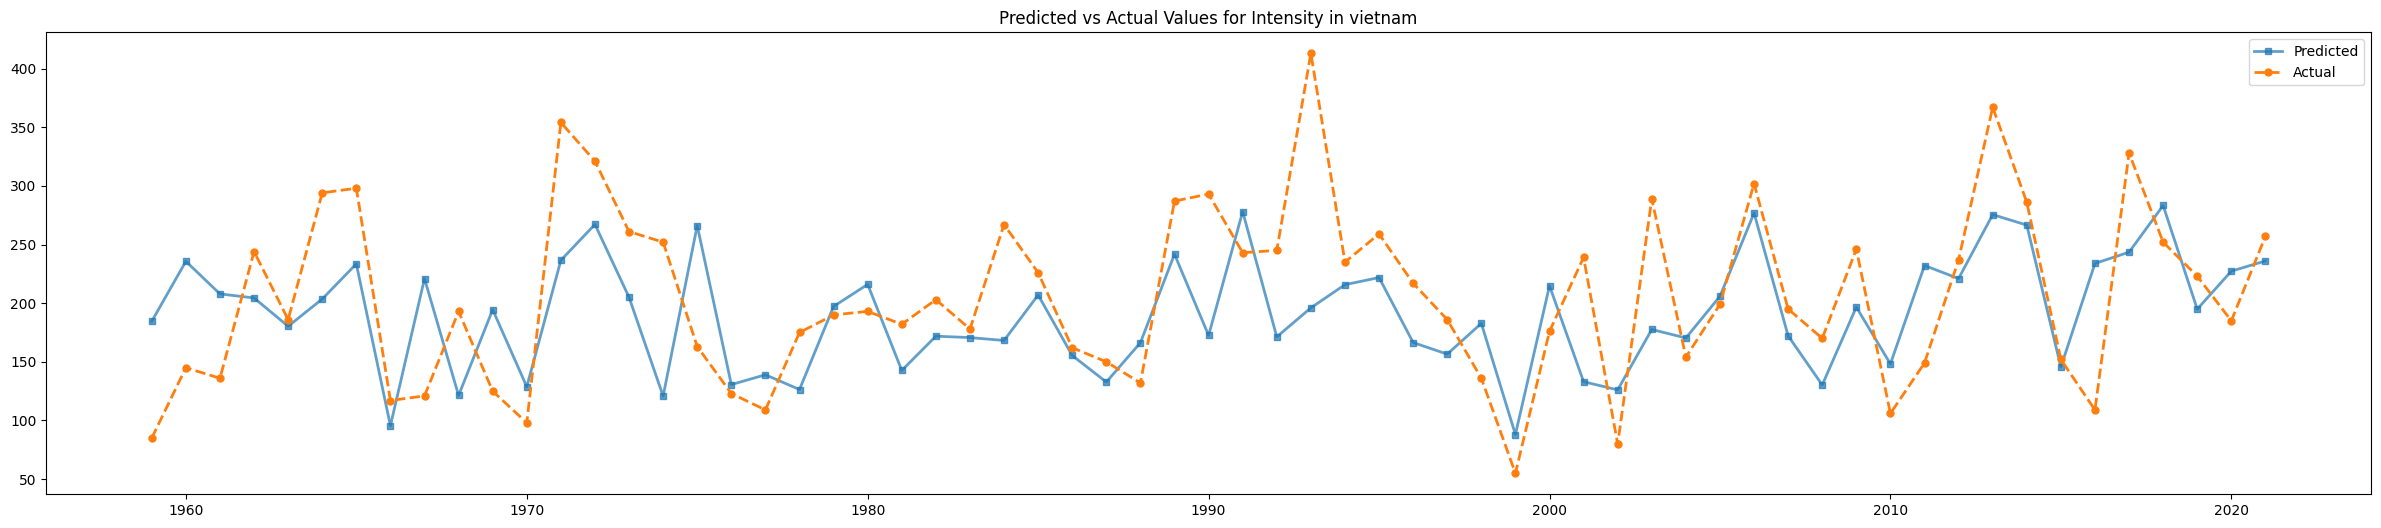

RMSE for y2: 61.24829540607088
Correlation for y2: 0.5336384141042992


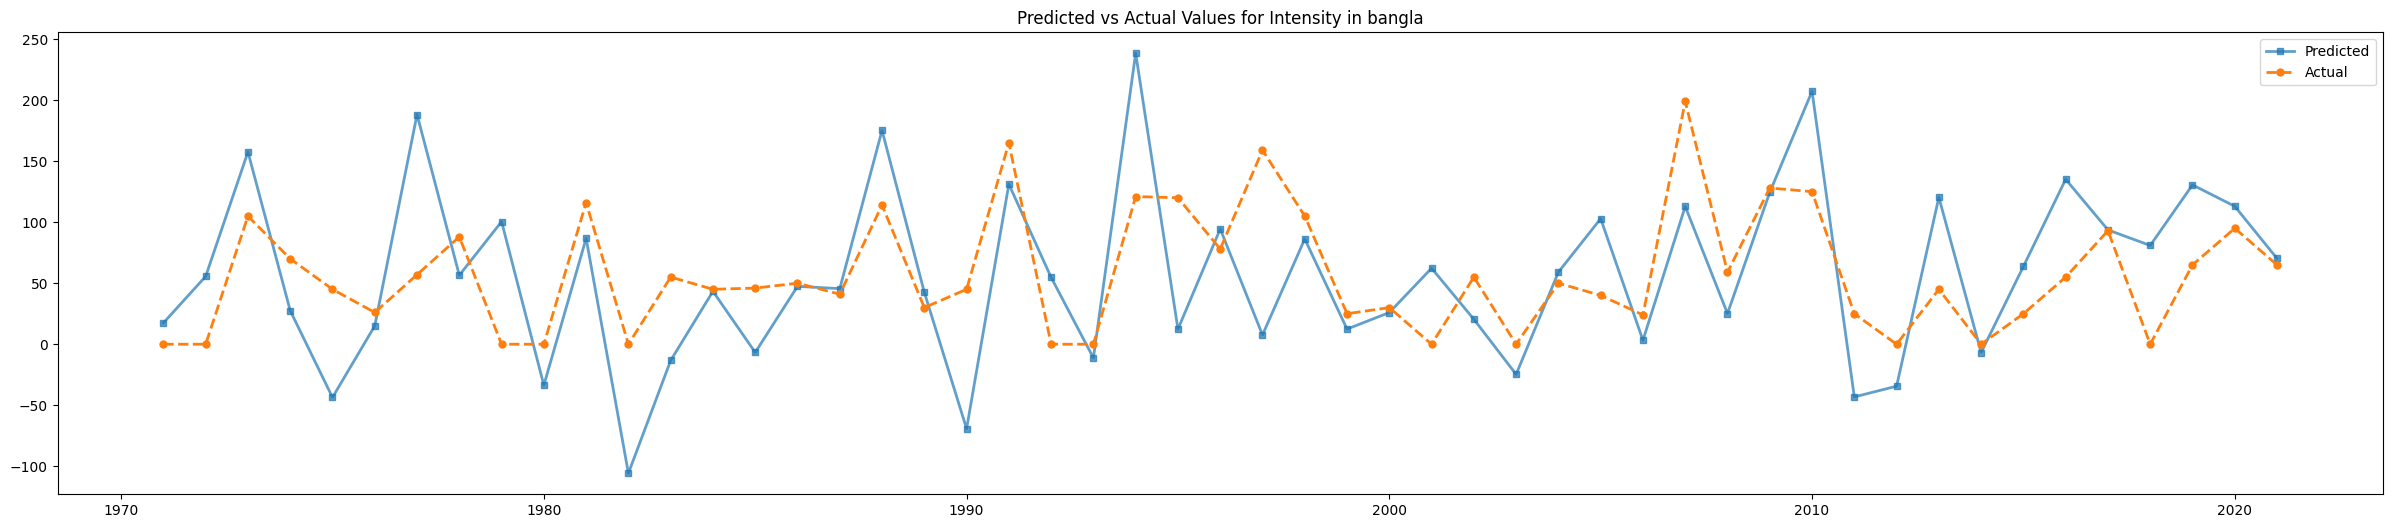

RMSE for y2: 78.0539559791056
Correlation for y2: 0.4014771275210248


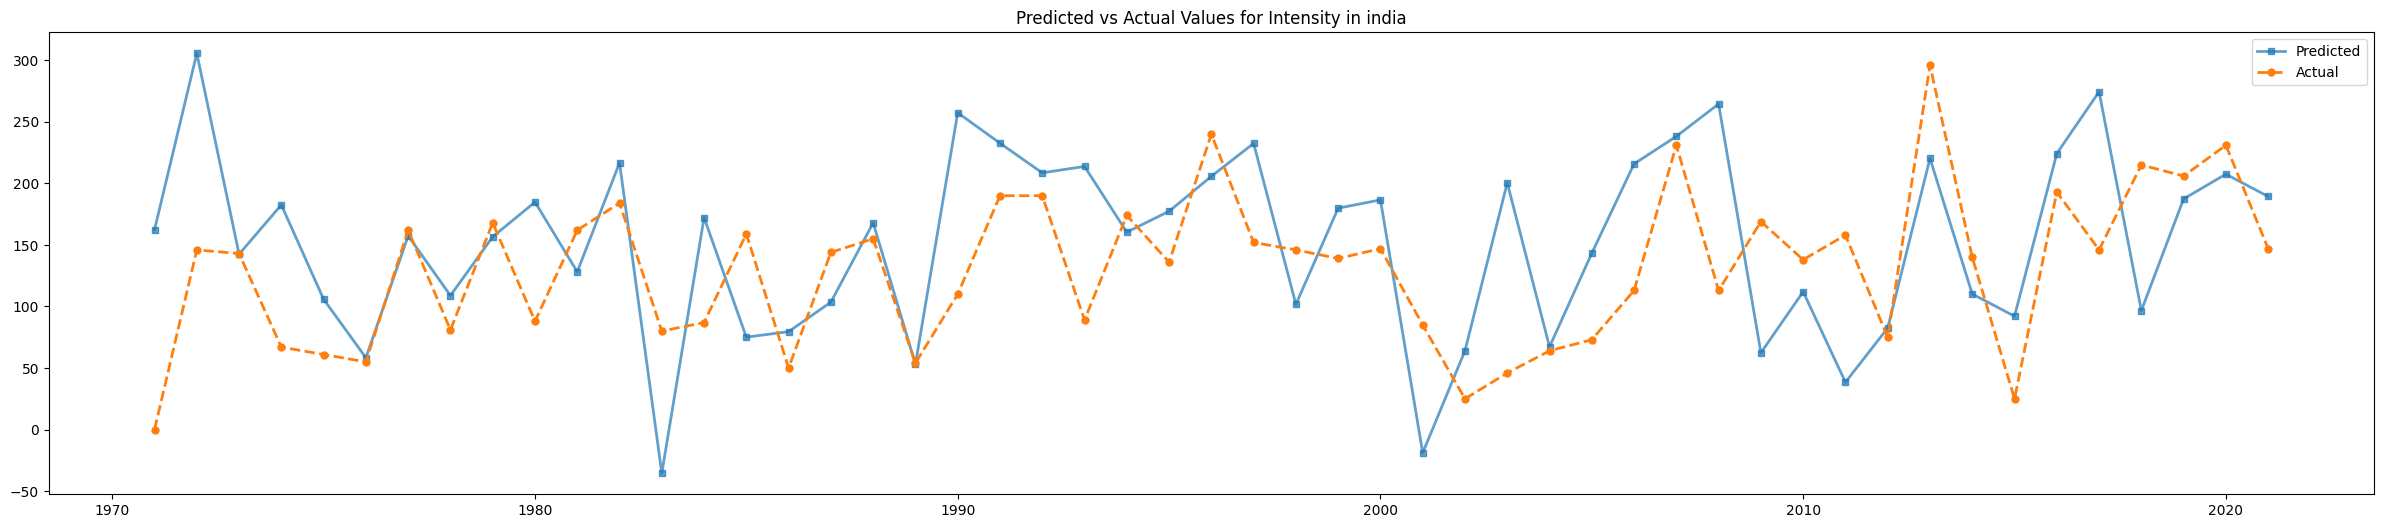

RMSE for y2: 98.01988380561865
Correlation for y2: 0.21462934840570544


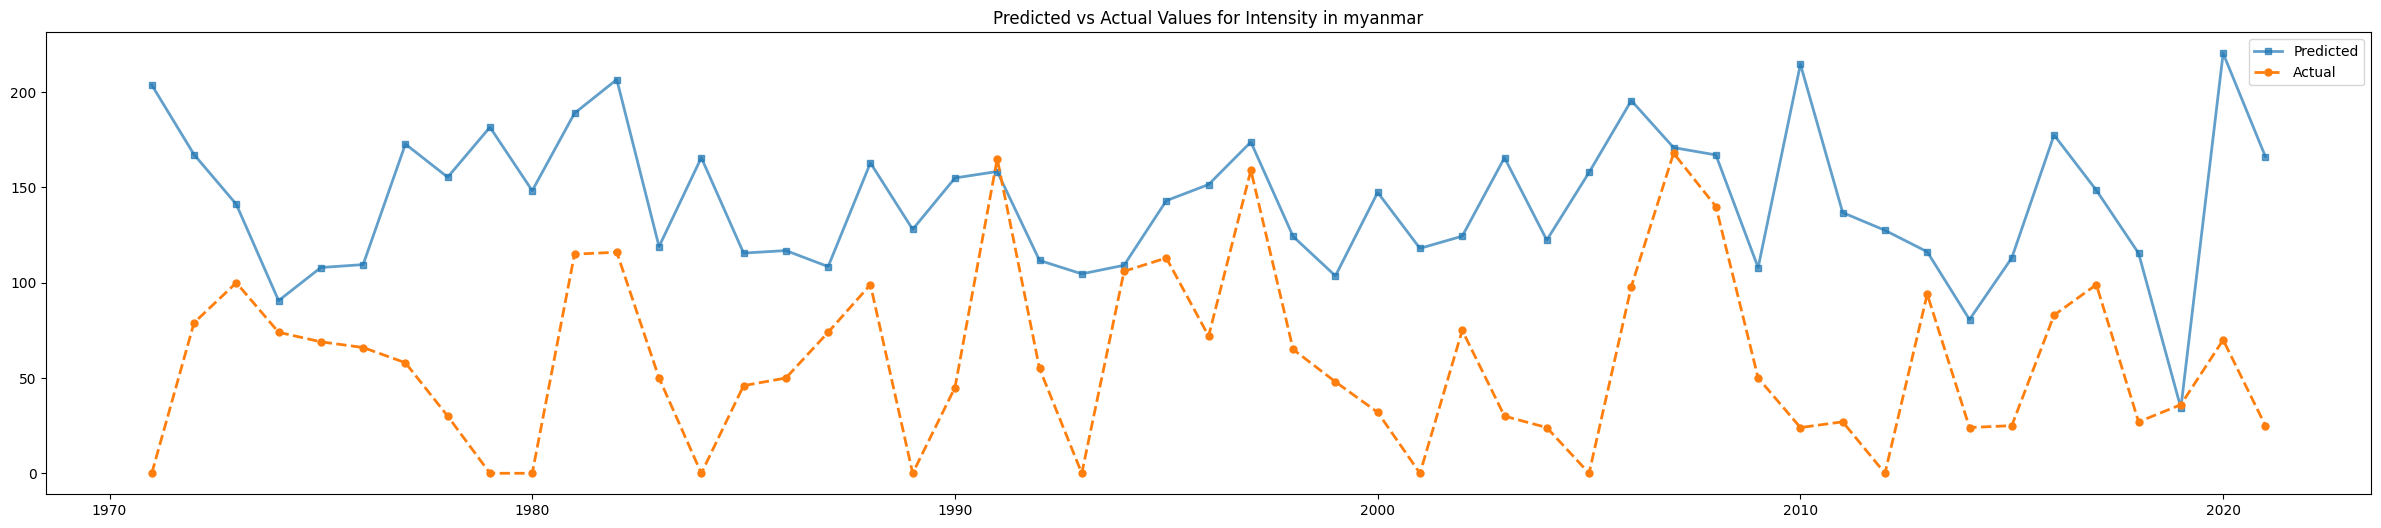

RMSE for y2: 116.72809781518426
Correlation for y2: -0.07998915047624502


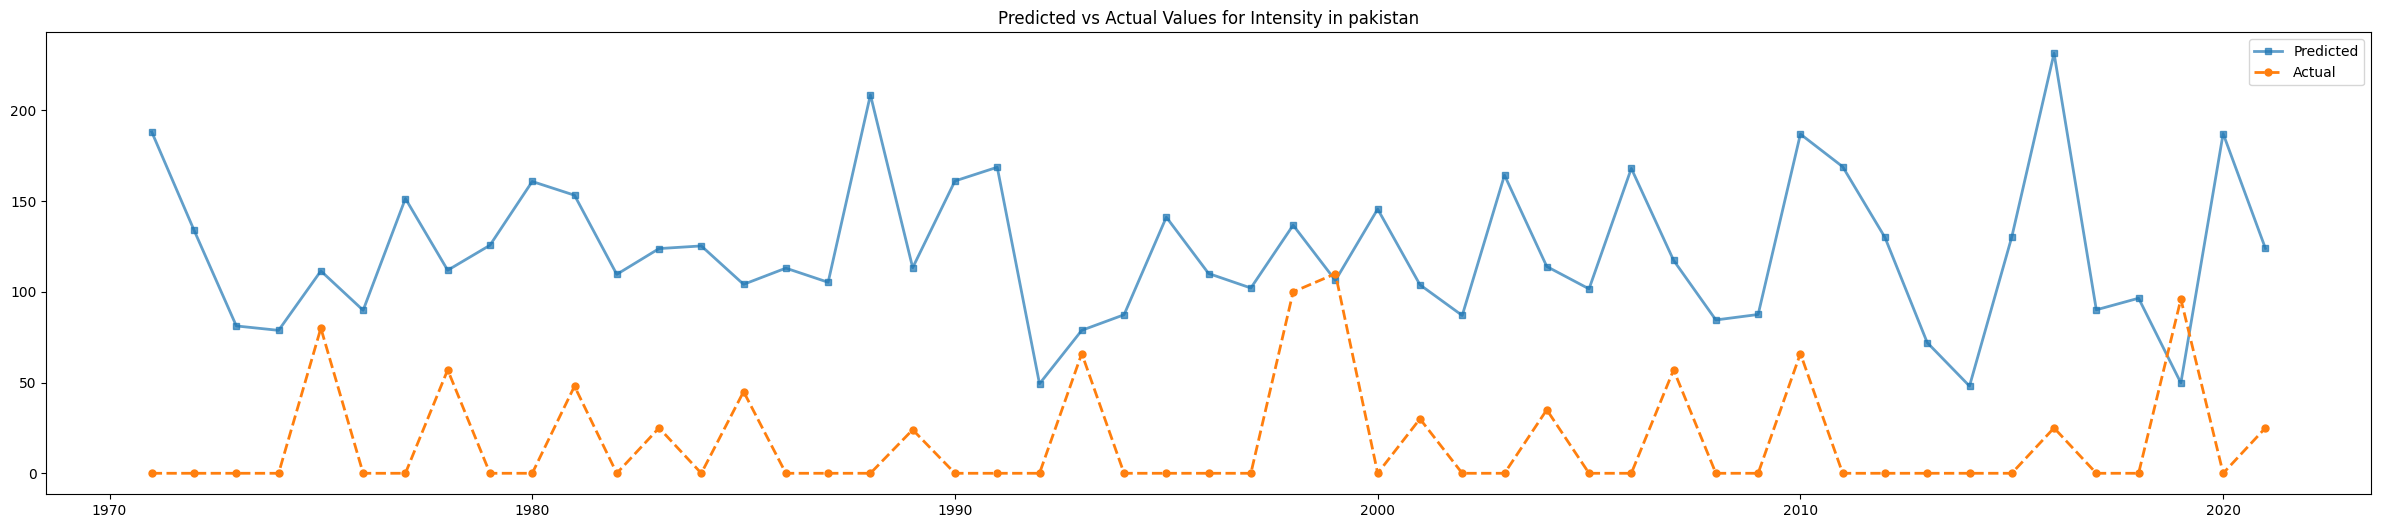

RMSE for y2: 96.74050632175505
Correlation for y2: 0.16854145548597427


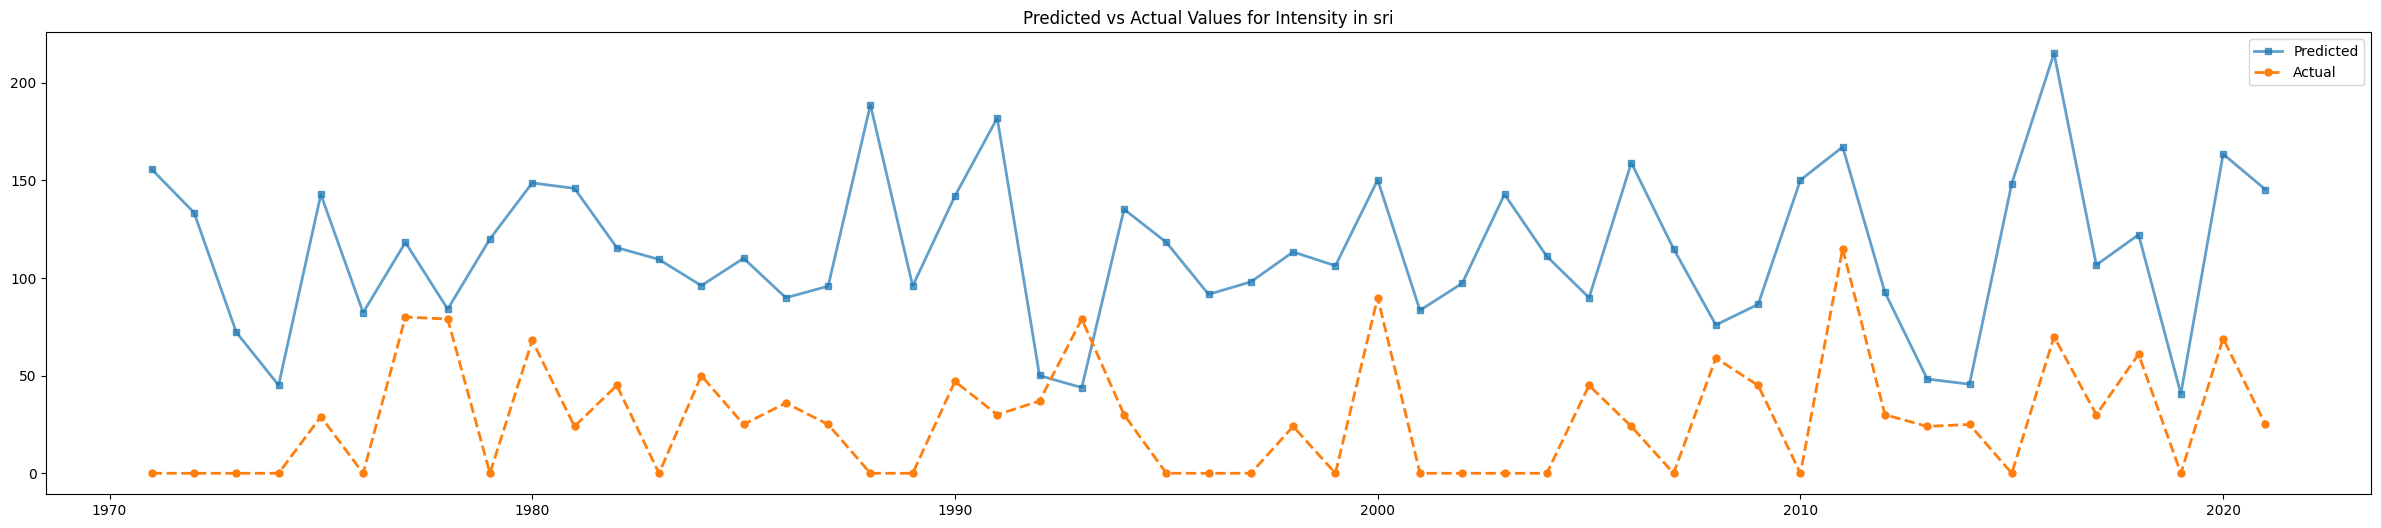

RMSE for y2: 53.955798166204055
Correlation for y2: 0.8412596099952887


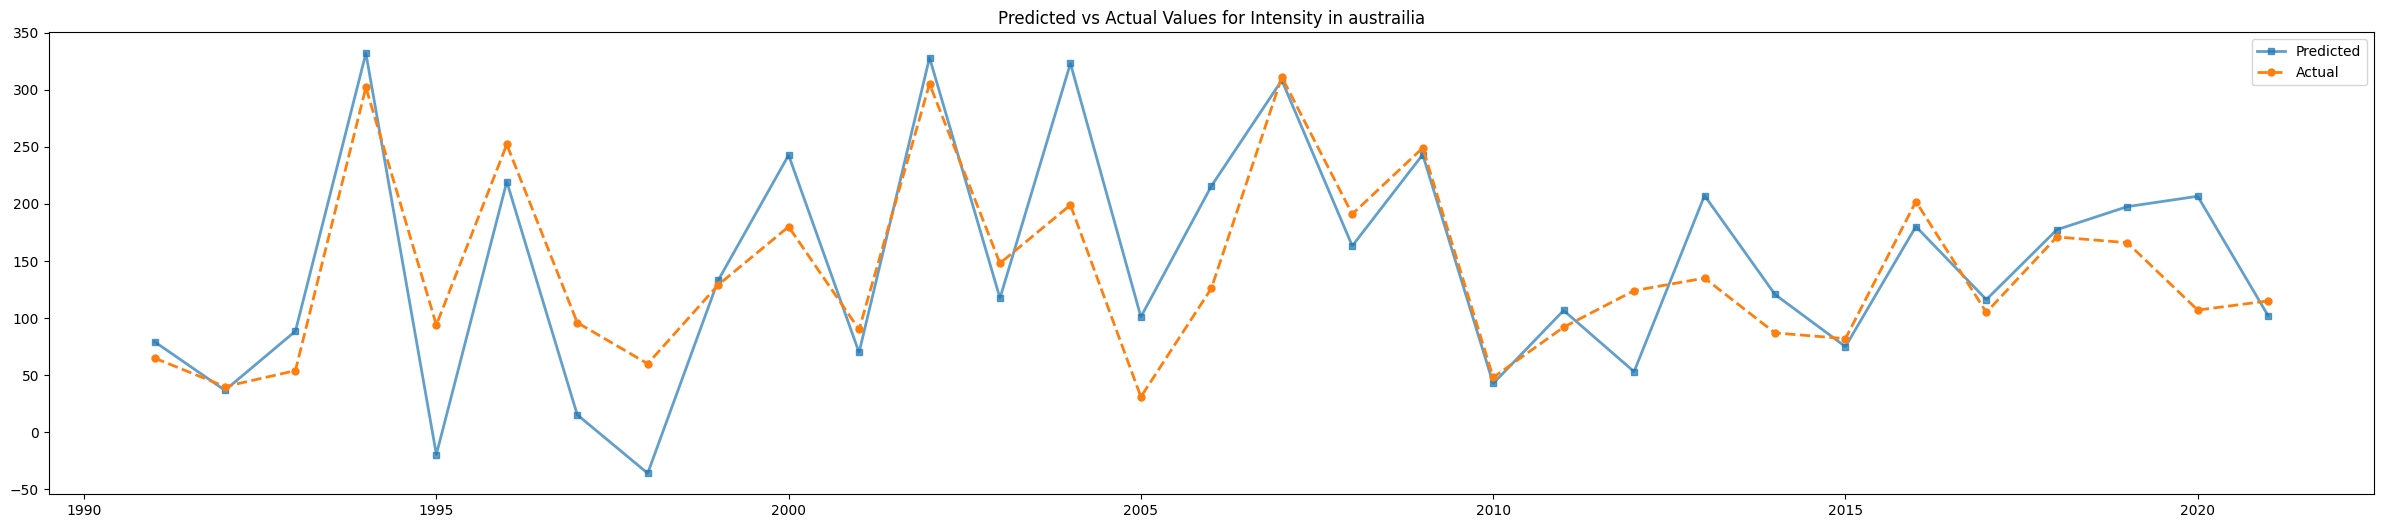

RMSE for y2: 72.75889593629644
Correlation for y2: 0.23040727874564546


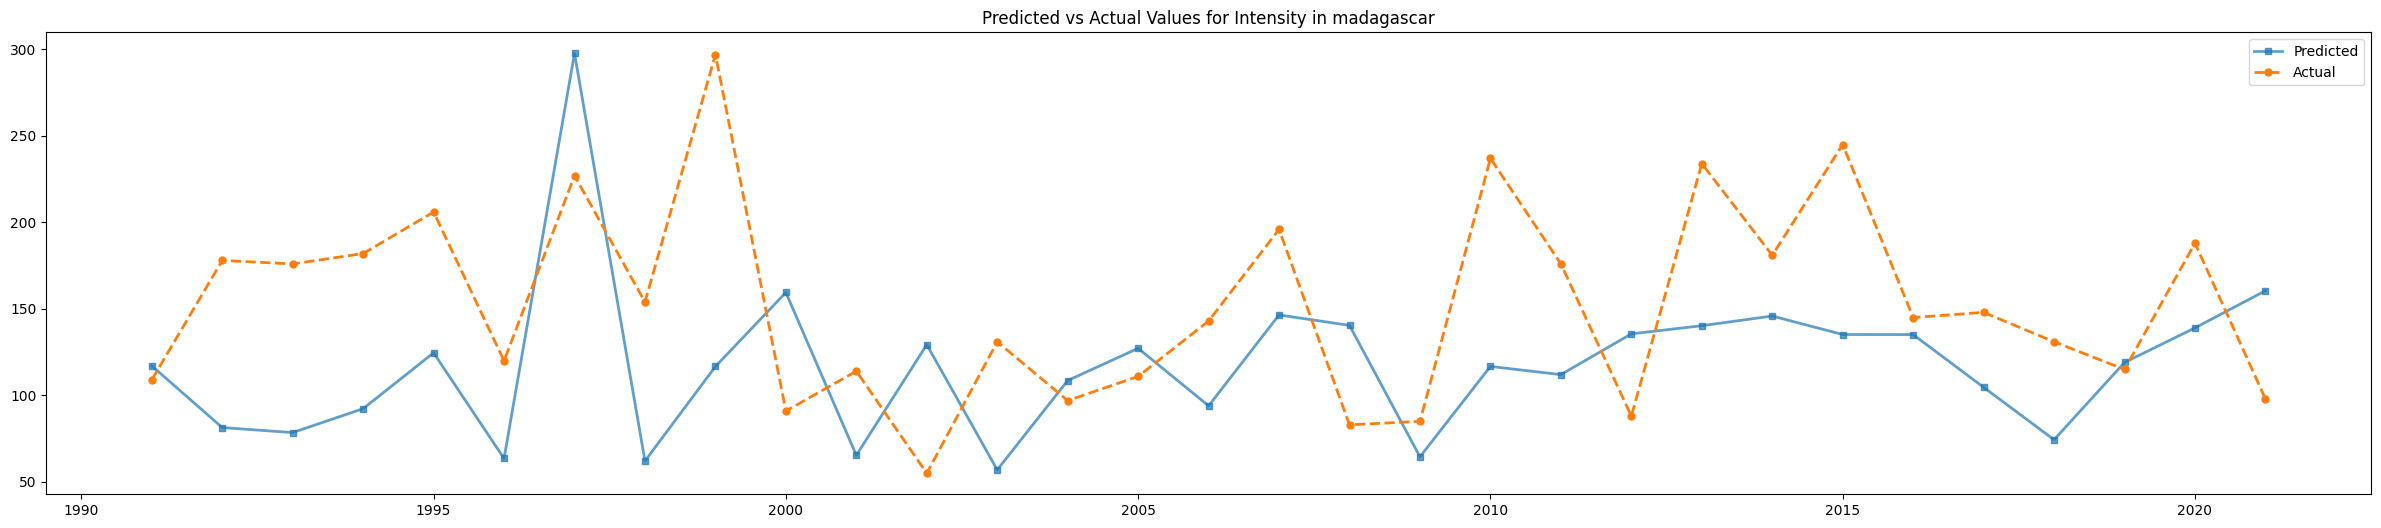

In [ ]:
# Load the predictions from the CSV file
y2_pred_df = pd.read_csv('y_pred_ANN_inten3.csv')

# Plot the predictions and actual values for y2 by country and month
countries = y2_pred_df['country'].unique()

for country in countries:
    country_pred_df = y2_pred_df[y2_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'y2_actual': 'sum', 'y2_pred': 'sum'}).reset_index()
    rmse_1 = np.sqrt(mean_squared_error(country_pred_df['y2_actual'], country_pred_df['y2_pred']))
    print("RMSE for y2:", rmse_1)
    corr = country_pred_df['y2_actual'].corr(country_pred_df['y2_pred'])
    print("Correlation for y2:", corr)
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['y2_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.plot(country_pred_df['year'], country_pred_df['y2_actual'], label="Actual", linewidth=2, linestyle='--', marker='o', markersize=5, alpha=1)
    plt.title(f"Predicted vs Actual Values for Intensity in {country}")
    plt.legend()
    plt.show()
